# 2 Week Stock Performance based on fundamental and technical indicators

#### Introduction: The purpose of this project is to determine if there is any combination of fundamental and technical indicators which will prove to be indicative of performance.  Fundamental data was purchased from simfin.com.  Daily stock data is a free download from eoddata.com.  Both sources would require upgrades to use in a real-time or near real-time environment.  Popular technical and fundamental technical indicators will be chose based on online research.  Histograms will be created to determine the shape of the data, and colinnearity will be measured to help determine variable selection. Finally, several linear and logistic models will be trained and assessed.

In [1]:
import pandas as pd
import numpy as np
import glob
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import ExtraTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import linregress
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import math
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
import simfin as sf
from simfin.names import *
from datetime import datetime
from datetime import timedelta
import tempfile


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=False, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 

# Initial Importation and Cleaning

In [3]:
sf.set_api_key('###################')

# Set the local directory where data-files are stored.
# The dir will be created if it does not already exist.
sf.set_data_dir('~/simfin_data/')

# Load the annual Income Statements for all companies in the US.
# The data is automatically downloaded if you don't have it already.
income_data = sf.load_income(variant='quarterly', market='us')
company_data = sf.load_companies()
industry_data = sf.load_industries()

Dataset "us-income-quarterly" on disk (10 days old).
- Loading from disk ... Done!
Dataset "us-companies" on disk (11 days old).
- Loading from disk ... Done!
Dataset "industries" on disk (10 days old).
- Loading from disk ... Done!


In [4]:
income_data

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2014-04-30      45846      USD         2014            Q2   2014-06-05   
       2014-07-31      45846      USD         2014            Q3   2014-09-02   
       2014-10-31      45846      USD         2014            Q4   2015-12-21   
       2015-01-31      45846      USD         2015            Q1   2015-03-09   
       2015-04-30      45846      USD         2015            Q2   2015-06-07   
...                      ...      ...          ...           ...          ...   
ZYXI   2022-09-30     171401      USD         2022            Q3   2022-10-27   
       2022-12-31     171401      USD         2022            Q4   2023-03-14   
       2023-03-31     171401      USD         2023            Q1   2023-04-27   
       2023-06-30     171401      USD         2023            Q2   2023-07-27   
       2023-09-30     171401      USD         2023            Q3   2023-10-26   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2014-04-30     2015-06-05     333000000.0       337000000.0   
       2014-07-31     2015-09-02     334000000.0       338000000.0   
       2014-10-31     2016-12-20     332000000.0       339000000.0   
       2015-01-31     2016-03-08     336000000.0       338000000.0   
       2015-04-30     2016-06-07     334000000.0       337000000.0   
...                          ...             ...               ...   
ZYXI   2022-09-30     2023-10-26      38046000.0        38865000.0   
       2022-12-31     2023-10-26      34718900.0        34663000.0   
       2023-03-31     2023-04-27      38467000.0        39127000.0   
       2023-06-30     2023-07-27      36435000.0        37061000.0   
       2023-09-30     2023-10-26      36435000.0        37061000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2014-04-30   9.880000e+08     -503000000.0  ...   
       2014-07-31   1.009000e+09     -507000000.0  ...   
       2014-10-31   1.043000e+09     -564000000.0  ...   
       2015-01-31   1.026000e+09     -513000000.0  ...   
       2015-04-30   9.630000e+08     -483000000.0  ...   
...                          ...              ...  ...   
ZYXI   2022-09-30   4.152000e+07       -8391000.0  ...   
       2022-12-31   4.880500e+07       -9388000.0  ...   
       2023-03-31   4.217000e+07       -9269000.0  ...   
       2023-06-30   4.495200e+07       -9272000.0  ...   
       2023-09-30   4.991500e+07       -9553000.0  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2014-04-30                   -25000000.0            -28000000.0   
       2014-07-31                   -46000000.0            -25000000.0   
       2014-10-31                   -92000000.0            -21000000.0   
       2015-01-31                    -2000000.0            -14000000.0   
       2015-04-30                   -11000000.0            -15000000.0   
...                                         ...                    ...   
ZYXI   2022-09-30                     -106000.0              -106000.0   
       2022-12-31                      -95000.0               -95000.0   
       2023-03-31                      -84000.0               -84000.0   
       2023-06-30                     -317000.0              -317000.0   
       2023-09-30                     -327000.0              -327000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2014-04-30                   69000000.0                      NaN   
       2014-07-31                   85000000.0                      NaN   
       2014-10-31                  -2

In [5]:
income_data2 = income_data[['Shares (Basic)','Net Income (Common)','Revenue']].copy()
income_data2['earnings_share'] = income_data2['Net Income (Common)']  / income_data2['Shares (Basic)'] 

In [6]:
income_data3 = income_data2.reset_index()

In [7]:
income_data3['annual_earnings'] = income_data3.groupby('Ticker')['Net Income (Common)'].rolling(window=4, min_periods=4).sum().reset_index()['Net Income (Common)']
income_data3['annual_revenue'] = income_data3.groupby('Ticker')['Revenue'].rolling(window=4, min_periods=4).sum().reset_index()['Revenue']

In [8]:
income_data3['earnings_shift1'] = income_data3.groupby('Ticker')['Net Income (Common)'].shift(1)
income_data3['revenue_shift1'] = income_data3.groupby('Ticker')['annual_revenue'].shift(1)

In [9]:
income_data3['earnings_growth'] = income_data3['annual_earnings'] / income_data3['earnings_shift1']
income_data3['revenue_growth'] = income_data3['annual_revenue'] / income_data3['revenue_shift1']

In [10]:
company_data2 = company_data['IndustryId'].copy().to_frame()
company_data3 = company_data2.reset_index().merge(industry_data, how='inner', left_on='IndustryId', right_on='IndustryId')

In [11]:
income_data4 = income_data3.reset_index().merge(company_data3, how='inner',left_on='Ticker', right_on = 'Ticker')

In [12]:
income_data4['Report Date_Next'] = income_data4.groupby(['Ticker'])['Report Date'].shift(-1)

In [13]:
income_data4['Report Date2'] = income_data4['Report Date'].dt.strftime('%Y%m%d')

In [14]:
income_data4['Report Date_Next'] = income_data4['Report Date_Next'].fillna(pd.to_datetime(income_data4['Report Date2']) + timedelta(days=90)).dt.strftime('%Y%m%d')

In [15]:
income_data4 = income_data4[['Ticker','Report Date', 'earnings_share','Industry','Sector','Report Date_Next','Report Date2','revenue_growth','earnings_growth']]

#### Nasdaq and NYSE data was pre downloaded to my computer after purchase

In [16]:
directoryPath = "F:/Stocks/ST/NASDAQ_FINAL/"
nasdaq_working_data = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.txt'):
    x = pd.read_csv(file_name, low_memory=False)
    nasdaq_working_data = pd.concat([nasdaq_working_data,x],axis=0)

In [17]:
nasdaq = nasdaq_working_data.rename(columns={"<ticker>": "ticker", "<date>": "date"
                          ,"<open>": "open"
                           ,"<high>": "high"
                           ,"<low>": "low"
                           ,"<close>": "close"
                           ,"<vol>": "volume"
                          })

In [18]:
directoryPath = "F:/Stocks/ST/NYSE_FINAL/"
nyse_working_data = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.txt'):
    x = pd.read_csv(file_name, low_memory=False)
    nyse_working_data = pd.concat([nyse_working_data,x],axis=0)

In [19]:
nyse = nyse_working_data.rename(columns={"<ticker>": "ticker", "<date>": "date"
                          ,"<open>": "open"
                           ,"<high>": "high"
                           ,"<low>": "low"
                           ,"<close>": "close"
                           ,"<vol>": "volume"
                          })

In [20]:
final_data = pd.concat([nasdaq,nyse],axis=0)

In [21]:
income_data4 = income_data4.rename(columns = {'Report Date_Next': 'report_date_next', 'Report Date2': 'report_date2'})

In [22]:
final_data.to_csv('~/final_data.csv')

In [23]:
income_data4.to_csv('~/income_data.csv')

In [24]:
income_data4 = pd.read_csv('~/income_data.csv')

In [25]:
final_data = pd.read_csv('~/final_data.csv')

#### Joining fundamentals with historical datasets

In [26]:
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

cond_join = '''select dF_left.*, df_right.* 
            from final_data as df_left
            join income_data4 as df_right
            on
                df_left.Ticker = df_right.Ticker
                and df_left.date > df_right.report_date2
                and df_left.date <= df_right.report_date_next
            '''


final_data_with_fund_temp = pysqldf(cond_join)

In [27]:
final_data_with_fund_temp.to_csv('~/final_data_with_fund_temp.csv')

In [28]:
final_data_with_fund_temp = pd.read_csv('~/final_data_with_fund_temp.csv')

In [29]:
final_data = final_data_with_fund_temp

In [30]:
final_data['earnings_days'] = pd.to_datetime(final_data['date'], format='%Y%m%d') - pd.to_datetime(final_data['report_date2'], format='%Y%m%d')

In [31]:
final_data['earnings_1wk'] = np.where(final_data['earnings_days'] < timedelta(days=7),1,0)
final_data['earnings_2wk'] = np.where(final_data['earnings_days'] < timedelta(days=14),1,0)
final_data['earnings_4wk'] = np.where(final_data['earnings_days'] < timedelta(days=28),1,0)
final_data['earnings_8wk'] = np.where(final_data['earnings_days'] < timedelta(days=56),1,0)

## Removing Tickers with High and Low Closing Prices

In [32]:
final_low = final_data.loc[final_data['close'] < 10]
low_ticks = final_low['ticker'].unique()
final_data2 = final_data[~final_data['ticker'].isin(low_ticks)]

In [33]:
final_high = final_data2.loc[final_data2['close'] > 300]
high_ticks = final_high['ticker'].unique()
final_data3 = final_data2[~final_data2['ticker'].isin(high_ticks)].copy()

## Removing Low Volume Tickers

In [34]:
final_data4 = final_data3.loc[final_data3['volume'] > 0].copy()

In [35]:
final_data4['date2'] = pd.to_datetime(final_data4['date'], format='%Y%m%d')

In [36]:
final_data4['month'] = final_data4['date2'].dt.month
final_data4['year'] = final_data4['date2'].dt.year

In [37]:
volume_summary = final_data4.groupby(['ticker','year','month']).mean('volume').reset_index()

In [38]:
low_volume_tickers = volume_summary.loc[volume_summary['volume'] < 50000]['ticker'].unique()

In [39]:
len(low_volume_tickers)

182

In [40]:
final_data5 = final_data4[~final_data4['ticker'].isin(low_volume_tickers)].copy()

In [41]:
final_data5 = final_data5.drop(columns = ['month','year','date'])

In [42]:
len(final_data5)

1661874

In [43]:
len(final_data5['ticker'].unique())

1110

# Adding Technical Indicator Precursors

In [44]:
final_data_precursor = final_data5.set_index(['ticker', 'date2']).copy()

## Adding Volatility

In [45]:
final_data_precursor['close-1'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(1)
final_data_precursor['pct_chg'] = (final_data_precursor['close'] / final_data_precursor['close-1']) - 1

final_data_precursor['volatility'] = final_data_precursor['pct_chg'].groupby(level=["ticker"]).rolling(min_periods=30, window=30).std().droplevel(0,axis = 0)*(252**0.5)
final_data_precursor = final_data_precursor.drop(columns = ['close-1','pct_chg'])

In [46]:
final_data_precursor

,,Unnamed: 0.2,Unnamed: 0,open,high,low,close,volume,Unnamed: 0.1,Ticker,Report Date,...,report_date_next,report_date2,revenue_growth,earnings_growth,earnings_days,earnings_1wk,earnings_2wk,earnings_4wk,earnings_8wk,volatility
ticker,date2,,,,,,,,,,,,,,,,,,,,,
ADI,2014-05-01,0,23,51.38,51.530,50.760,50.82,1529000,1900,ADI,2014-04-30,...,20140731,20140430,NaN,NaN,1 days,1,1,1,1,NaN
AMAT,2014-05-01,2,53,19.13,19.290,18.860,18.88,17221300,5036,AMAT,2014-04-30,...,20140731,20140430,NaN,NaN,1 days,1,1,1,1,NaN
AVAV,2014-05-01,3,111,33.65,34.240,33.060,33.84,311000,9910,AVAV,2014-04-30,...,20140731,20140430,NaN,NaN,1 days,1,1,1,1,NaN
CAKE,2014-05-01,4,177,45.14,45.640,44.780,45.59,1002900,16158,CAKE,2014-04-30,...,20140731,20140430,NaN,NaN,1 days,1,1,1,1,NaN
CASY,2014-05-01,5,188,68.38,68.740,67.340,68.41,190300,16632,CASY,2014-04-30,...,20140731,20140430,NaN,NaN,1 days,1,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2023-10-17,4680500,2967,119.04,119.978,118.865,119.44,1267400,103252,YUM,2023-09-30,...,20231231,20230930,1.009727,3.590909,17 days,0,0,1,1,0.195956
YUMC,2023-10-17,4680501,2968,52.66,53.190,52.600,52.90,1048500,103277,YUMC,2023-09-30,...,20231231,20230930,1.022138,3.974619,17 days,0,0,1,1,0.294624
ZBH,2023-10-17,4680502,2969,104.37,108.020,104.090,106.59,1455000,103402,ZBH,2023-09-30,...,20231231,20230930,1.011646,2.262154,17 days,0,0,1,1,0.301295


### Money Flow Index

In [47]:
final_data_precursor = final_data_precursor.sort_index(ascending=True)
final_data_precursor['typical'] = (final_data_precursor['close'] + final_data_precursor['high'] + final_data_precursor['low']) / 3
final_data_precursor['money_flow'] = final_data_precursor['typical'] *  final_data_precursor['volume']
shifted = final_data_precursor.groupby(level=["ticker"]).shift(1)['money_flow'].to_frame()
final_data_precursor = final_data_precursor.join(shifted, rsuffix='_lag')
final_data_precursor['net_money_flow'] = final_data_precursor['money_flow'] - final_data_precursor['money_flow_lag']
final_data_precursor['pos_money_flow'] = final_data_precursor[final_data_precursor['net_money_flow'] > 0]['net_money_flow']
final_data_precursor['pos_money_flow'].fillna(0, inplace=True)
final_data_precursor['neg_money_flow'] = -final_data_precursor[final_data_precursor['net_money_flow'] < 0]['net_money_flow']
final_data_precursor['neg_money_flow'].fillna(0, inplace=True)
final_data_precursor['pos_money_flow30'] = final_data_precursor['pos_money_flow'].groupby(level=["ticker"]).rolling(min_periods=30, window=30).sum().droplevel(0,axis = 0)
final_data_precursor['neg_money_flow30'] = final_data_precursor['neg_money_flow'].groupby(level=["ticker"]).rolling(min_periods=30, window=30).sum().droplevel(0,axis = 0)
final_data_precursor['money_ratio'] = final_data_precursor['pos_money_flow30'] / final_data_precursor['neg_money_flow30']
final_data_precursor['money_flow_index'] =    100 - (100/(1+ final_data_precursor['money_ratio']))

final_data_precursor = final_data_precursor.drop(columns = ['net_money_flow','money_flow','money_flow_lag',
                                                            'pos_money_flow','neg_money_flow','pos_money_flow30',
                                                            'neg_money_flow30','money_ratio','typical'])


### Exponential Moving Averages

In [48]:
final_data_precursor['ema_12'] = final_data_precursor['close'].groupby(level=["ticker"]).ewm(span=12,min_periods=12,adjust=False).mean().droplevel(0,axis = 0)
final_data_precursor['ema_26'] = final_data_precursor['close'].groupby(level=["ticker"]).ewm(span=26,min_periods=26,adjust=False).mean().droplevel(0,axis = 0)
final_data_precursor['ema_40'] = final_data_precursor['close'].groupby(level=["ticker"]).ewm(span=40,min_periods=40,adjust=False).mean().droplevel(0,axis = 0)
final_data_precursor['ema_100'] = final_data_precursor['close'].groupby(level=["ticker"]).ewm(span=100,min_periods=100, adjust=False).mean().droplevel(0,axis = 0)
final_data_precursor['ema_200'] = final_data_precursor['close'].groupby(level=["ticker"]).ewm(span=200,min_periods=200, adjust=False).mean().droplevel(0,axis = 0)

final_data_precursor['ema_12_Dist'] = (final_data_precursor['ema_12'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['ema_26_Dist'] = (final_data_precursor['ema_26'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['ema_40_Dist'] = (final_data_precursor['ema_40'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['ema_100_Dist'] = (final_data_precursor['ema_100'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['ema_200_Dist'] = (final_data_precursor['ema_200'] - final_data_precursor['close']) / final_data_precursor['close']


### KST Indicator

####      ROC

In [49]:
final_data_precursor['Close-10'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(10)
final_data_precursor['Close-15'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(15)
final_data_precursor['Close-20'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(20)
final_data_precursor['Close-30'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(30)

final_data_precursor['ROC10'] = (final_data_precursor['close'] - final_data_precursor['Close-10'])/ final_data_precursor['Close-10'] * 100
final_data_precursor['ROC15'] = (final_data_precursor['close'] - final_data_precursor['Close-15'])/ final_data_precursor['Close-15'] * 100
final_data_precursor['ROC20'] = (final_data_precursor['close'] - final_data_precursor['Close-20'])/ final_data_precursor['Close-20'] * 100
final_data_precursor['ROC30'] = (final_data_precursor['close'] - final_data_precursor['Close-30'])/ final_data_precursor['Close-30'] * 100

In [50]:
final_data_precursor['ROC10MA'] = final_data_precursor['ROC10'].groupby(level=["ticker"]).rolling(min_periods=10, window=10).mean().droplevel(0,axis = 0)
final_data_precursor['ROC15MA'] = final_data_precursor['ROC15'].groupby(level=["ticker"]).rolling(min_periods=15, window=15).mean().droplevel(0,axis = 0)
final_data_precursor['ROC20MA'] = final_data_precursor['ROC20'].groupby(level=["ticker"]).rolling(min_periods=20, window=20).mean().droplevel(0,axis = 0)
final_data_precursor['ROC30MA'] = final_data_precursor['ROC30'].groupby(level=["ticker"]).rolling(min_periods=30, window=30).mean().droplevel(0,axis = 0)

In [51]:
final_data_precursor['KST'] = (final_data_precursor['ROC10MA'] + final_data_precursor['ROC15MA']*2 
                               + final_data_precursor['ROC20MA']*3 + final_data_precursor['ROC30MA']*4)/10
final_data_precursor['KST-1'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(1)
final_data_precursor['KST-2'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(2)
final_data_precursor['KST-3'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(3)
final_data_precursor['KST-4'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(4)
final_data_precursor['KST-5'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(5)
final_data_precursor['KST-6'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(6)
final_data_precursor['KST-7'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(7)
final_data_precursor['KST-8'] = final_data_precursor['KST'].groupby(level=["ticker"]).shift(8)

In [52]:
final_data_precursor['KST_Signal'] = (final_data_precursor['KST'] + final_data_precursor['KST-1'] + 
                                      final_data_precursor['KST-2'] + final_data_precursor['KST-3'] + 
                                      final_data_precursor['KST-4'] + final_data_precursor['KST-5'] +
                                      final_data_precursor['KST-6'] + final_data_precursor['KST-7'] +
                                      final_data_precursor['KST-8'])/9


In [53]:
final_data_precursor['KST2'] = final_data_precursor['KST'] / final_data_precursor['close']
final_data_precursor['KST_Signal2'] = final_data_precursor['KST_Signal'] / final_data_precursor['close']

In [54]:
final_data_precursor = final_data_precursor.drop(columns = ['ROC10','ROC15','ROC20','ROC30',
                                                            'ROC10MA','ROC15MA','ROC20MA','ROC30MA',
                                                            'KST-1','KST-2','KST-3',
                                                            'KST-4','KST-5','KST-6',
                                                            'KST-7','KST-8'])

## Trendlines(Excluded for the time being)

## Bollinger Bands

In [55]:
final_data_precursor['sma_20'] = final_data_precursor['close'].groupby(level=["ticker"]).rolling(min_periods=20, window=20).mean().droplevel(0,axis = 0)
final_data_precursor['std_20'] = final_data_precursor['close'].groupby(level=["ticker"]).rolling(min_periods=20, window=20).std().droplevel(0,axis = 0)
final_data_precursor['Boll_Upper'] = final_data_precursor['sma_20'] + (final_data_precursor['std_20'] * 2)
final_data_precursor['Boll_Mid'] = final_data_precursor['sma_20']
final_data_precursor['Boll_Lower'] = final_data_precursor['sma_20'] - (final_data_precursor['std_20'] * 2)

final_data_precursor['Boll_Upper_Dist'] = ((final_data_precursor['Boll_Upper'] / final_data_precursor['close']) - 1) / final_data_precursor['volatility']
final_data_precursor['Boll_Mid_Dist'] = ((final_data_precursor['Boll_Mid'] / final_data_precursor['close']) - 1) / final_data_precursor['volatility']
final_data_precursor['Boll_Lower_Dist'] = ((final_data_precursor['Boll_Lower'] /final_data_precursor['close']) - 1) / final_data_precursor['volatility']

## Relative Strength Index (RSI): 

In [56]:
final_data_precursor['delta']  = final_data_precursor['close'].groupby(level=["ticker"]).diff() 
final_data_precursor['gain']  = final_data_precursor['delta'].where(final_data_precursor['delta'] > 0, 0) 
final_data_precursor['loss']  = -final_data_precursor['delta'].where(final_data_precursor['delta'] < 0, 0) 
 
# Calculate average gain and loss 
final_data_precursor['average_gain']  = final_data_precursor['gain'].groupby(level=["ticker"]).rolling(window=14).mean().droplevel(0,axis = 0) 
final_data_precursor['average_loss']  = final_data_precursor['loss'].groupby(level=["ticker"]).rolling(window=14).mean().droplevel(0,axis = 0)
 
# Calculate RSI 
final_data_precursor['rs']  = final_data_precursor['average_gain'] / final_data_precursor['average_loss'].abs() 
final_data_precursor['RSI'] = 100 - (100 / (1 + final_data_precursor['rs'])) 

final_data_precursor = final_data_precursor.drop(columns = ['delta','gain','average_gain','average_loss','loss','rs'])

## MACD 

In [57]:
final_data_precursor['MACD_Line'] = final_data_precursor['ema_12'] - final_data_precursor['ema_26']
final_data_precursor['MACD_Signal'] = final_data_precursor['MACD_Line'].groupby(level=["ticker"]).ewm(span=9,min_periods=9,adjust=False).mean().droplevel(0,axis = 0)
final_data_precursor['MACD_Histogram'] = final_data_precursor['MACD_Line'] - final_data_precursor['MACD_Signal']

final_data_precursor['MACD_Line2'] = final_data_precursor['MACD_Line'] / final_data_precursor['close']
final_data_precursor['MACD_Signal2'] = final_data_precursor['MACD_Signal'] / final_data_precursor['close']
final_data_precursor['MACD_Histogram2'] = final_data_precursor['MACD_Histogram'] / final_data_precursor['close']

## Stochastic Oscillator

In [58]:
final_data_precursor['Lowest_Low'] = final_data_precursor['low'].groupby(level=["ticker"]).rolling(min_periods=14, window=14).min().droplevel(0,axis = 0)
final_data_precursor['Highest_High'] = final_data_precursor['high'].groupby(level=["ticker"]).rolling(min_periods=14, window=14).max().droplevel(0,axis = 0)
final_data_precursor['SO_K'] = (final_data_precursor['close'] - final_data_precursor['Lowest_Low'])  / (final_data_precursor['Highest_High'] - final_data_precursor['Lowest_Low']) * 100
final_data_precursor['SO_D'] = final_data_precursor['SO_K'].groupby(level=["ticker"]).rolling(min_periods=3, window=3).mean().droplevel(0,axis = 0)

## Average True Range (ATR)

In [59]:
final_data_precursor['Close_1'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(1)
final_data_precursor['ATR_A'] = abs(final_data_precursor['high']-final_data_precursor['low'])
final_data_precursor['ATR_B'] = abs(final_data_precursor['high']-final_data_precursor['Close_1'])
final_data_precursor['ATR_C']  = abs(final_data_precursor['low']-final_data_precursor['Close_1'])
final_data_precursor['TR'] = final_data_precursor[["ATR_A", "ATR_B","ATR_C"]].max(axis=1)  
final_data_precursor['ATR'] = final_data_precursor['TR'].groupby(level=["ticker"]).rolling(min_periods=14, window=14).mean().droplevel(0,axis = 0)
final_data_precursor['ATR2'] = final_data_precursor['ATR'] / final_data_precursor['close']


final_data_precursor = final_data_precursor.drop(columns = ['Close_1','ATR_A','ATR_B','ATR_C','TR'])

## Fibonacci Levels

In [60]:
final_data_precursor['fibo0'] = final_data_precursor['close'].groupby(level=["ticker"]).rolling(min_periods=90, window=90).min().droplevel(0,axis = 0)
final_data_precursor['fibo100'] = final_data_precursor['close'].groupby(level=["ticker"]).rolling(min_periods=90, window=90).max().droplevel(0,axis = 0)
final_data_precursor['fibo25'] = ((final_data_precursor['fibo100'] - final_data_precursor['fibo0']) * .25) + final_data_precursor['fibo0']
final_data_precursor['fibo38'] = ((final_data_precursor['fibo100'] - final_data_precursor['fibo0']) * .38) + final_data_precursor['fibo0']
final_data_precursor['fibo50'] = ((final_data_precursor['fibo100'] - final_data_precursor['fibo0']) * .50) + final_data_precursor['fibo0']
final_data_precursor['fibo618'] = ((final_data_precursor['fibo100'] - final_data_precursor['fibo0']) * .618) + final_data_precursor['fibo0']
final_data_precursor['fibo786'] = ((final_data_precursor['fibo100'] - final_data_precursor['fibo0']) * .786) + final_data_precursor['fibo0']
final_data_precursor['fibo886'] = ((final_data_precursor['fibo100'] - final_data_precursor['fibo0']) * .886) + final_data_precursor['fibo0']


final_data_precursor['fibo0_Dist'] = (final_data_precursor['fibo0'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['fibo25_Dist'] = (final_data_precursor['fibo25'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['fibo50_Dist'] = (final_data_precursor['fibo50'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['fibo618_Dist'] = (final_data_precursor['fibo618'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['fibo786_Dist'] = (final_data_precursor['fibo786'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['fibo886_Dist'] = (final_data_precursor['fibo886'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['fibo100_Dist'] = (final_data_precursor['fibo100'] - final_data_precursor['close']) / final_data_precursor['close']

## Ichimoku Cloud

In [61]:
final_data_precursor['IC_9_High'] = final_data_precursor['high'].groupby(level=["ticker"]).rolling(min_periods=9, window=9).max().droplevel(0,axis = 0)
final_data_precursor['IC_9_Low'] = final_data_precursor['low'].groupby(level=["ticker"]).rolling(min_periods=9, window=9).min().droplevel(0,axis = 0)
final_data_precursor['IC_26_High'] = final_data_precursor['high'].groupby(level=["ticker"]).rolling(min_periods=26, window=26).max().droplevel(0,axis = 0)
final_data_precursor['IC_26_Low'] = final_data_precursor['low'].groupby(level=["ticker"]).rolling(min_periods=26, window=26).min().droplevel(0,axis = 0)
final_data_precursor['IC_52_High'] = final_data_precursor['high'].groupby(level=["ticker"]).rolling(min_periods=52, window=52).max().droplevel(0,axis = 0)
final_data_precursor['IC_52_Low'] = final_data_precursor['low'].groupby(level=["ticker"]).rolling(min_periods=52, window=52).min().droplevel(0,axis = 0)

final_data_precursor['IC_CL'] = (final_data_precursor['IC_9_High'] + final_data_precursor['IC_9_Low']) / 2
final_data_precursor['IC_BL'] = (final_data_precursor['IC_26_High'] + final_data_precursor['IC_26_Low']) / 2

final_data_precursor['LS_A'] = (final_data_precursor['IC_CL'] + final_data_precursor['IC_BL']) / 2
final_data_precursor['LS_B'] = (final_data_precursor['IC_52_High'] + final_data_precursor['IC_52_Low']) / 2

final_data_precursor['Close_26'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(26)

final_data_precursor = final_data_precursor.drop(columns = ['IC_9_High','IC_9_Low','IC_26_High','IC_26_Low','IC_52_High','IC_52_Low'])


final_data_precursor['IC_CL2'] = (final_data_precursor['IC_CL']  - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['IC_BL2'] = (final_data_precursor['IC_BL'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['LS_A2'] = (final_data_precursor['LS_A'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['LS_B2'] = (final_data_precursor['LS_B'] - final_data_precursor['close']) / final_data_precursor['close']
final_data_precursor['Close_26_2'] =  (final_data_precursor['Close_26'] - final_data_precursor['close']) / final_data_precursor['close']

## On-Balance Volume (OBV)

In [62]:
final_data_precursor['Close_1'] = final_data_precursor['close'].groupby(level=["ticker"]).shift(1)
final_data_precursor['OBV_A'] = np.where(final_data_precursor['close']  > final_data_precursor['Close_1'],final_data_precursor['volume'],0)
final_data_precursor['OBV_A'] = np.where(final_data_precursor['close']  < final_data_precursor['Close_1'],-final_data_precursor['volume'],final_data_precursor['OBV_A'])
final_data_precursor['OBV_A'] = np.where(final_data_precursor['close']  == final_data_precursor['Close_1'],0,final_data_precursor['OBV_A'])
final_data_precursor['OBV'] = final_data_precursor['OBV_A'].groupby(level=["ticker"]).rolling(min_periods=26, window=26).sum().droplevel(0,axis = 0)
final_data_precursor = final_data_precursor.drop(columns = ['Close_1','OBV_A'])

final_data_precursor['vol26_avg'] = final_data_precursor['volume'].groupby(level=["ticker"]).rolling(min_periods=26, window=26).mean().droplevel(0,axis = 0)
final_data_precursor['OBV2'] = final_data_precursor['OBV'] / final_data_precursor['vol26_avg']

In [63]:
final_data_precursor

Unnamed: 0.2  Unnamed: 0     open     high      low  \
ticker date2                                                             
A      2014-05-01       2549543           0  38.5837  39.2489  38.3834   
       2014-05-02       2549599           0  38.9843  39.3348  38.6910   
       2014-05-05       2549655           0  38.8484  39.5851  38.5479   
       2014-05-06       2549711           0  39.3991  39.6638  38.9557   
       2014-05-07       2549767           0  39.4349  39.4349  38.8197   
...                         ...         ...      ...      ...      ...   
ZUMZ   2023-10-12       2542953        4522  17.2200  17.2200  16.3100   
       2023-10-13       2544607        4464  16.4800  16.4800  15.6700   
       2023-10-16       2546266        4501  15.9500  16.9600  15.9500   
       2023-10-17       2547923        4484  16.8600  17.7600  16.6550   
       2023-10-18       2549541        3933  17.5200  17.5800  17.2400   

                     close   volume  Unnamed: 0.1 Ticker Report Date  ...  \
ticker date2                                                          ...   
A      2014-05-01  38.9628  1472400             0      A  2014-04-30  ...   
       2014-05-02  39.0129  2080900             0      A  2014-04-30  ...   
       2014-05-05  39.5780  2087200             0      A  2014-04-30  ...   
       2014-05-06  39.3491  2224200             0      A  2014-04-30  ...   
       2014-05-07  39.3634  2219200             0      A  2014-04-30  ...   
...                    ...      ...           ...    ...         ...  ...   
ZUMZ   2023-10-12  16.5000   256700        103890   ZUMZ  2023-07-31  ...   
       2023-10-13  15.8100   409400        103890   ZUMZ  2023-07-31  ...   
       2023-10-16  16.8600   266900        103890   ZUMZ  2023-07-31  ...   
       2023-10-17  17.6900   298400        103890   ZUMZ  2023-07-31  ...   
       2023-10-18  17.2400    45812        103890   ZUMZ  2023-07-31  ...   

                     LS_B Close_26    IC_CL2    IC_BL2     LS_A2     LS_B2  \
ticker date2                                                                 
A      2014-05-01     NaN      NaN       NaN       NaN       NaN       NaN   
       2014-05-02     NaN      NaN       NaN       NaN       NaN       NaN   
       2014-05-05     NaN      NaN       NaN       NaN       NaN       NaN   
       2014-05-06     NaN      NaN       NaN       NaN       NaN       NaN   
       2014-05-07     NaN      NaN       NaN       NaN       NaN       NaN   
...                   ...      ...       ...       ...       ...       ...   
ZUMZ   2023-10-12  17.690   18.710  0.033030  0.051212  0.042121  0.072121   
       2023-10-13  17.525   18.660  0.051233  0.068020  0.059627  0.108476   
       2023-10-16  17.525   16.755 -0.014235  0.000593 -0.006821  0.039442   
       2023-10-17  17.525   17.450 -0.055116 -0.046354 -0.050735 -0.009327   
       2023-10-18  17.525   16.475 -0.030452 -0.021462 -0.025957  0.016531   

                   Close_26_2        OBV      vol26_avg      OBV2  
ticker date2                                                       
A      2014-05-01         NaN        NaN            NaN       NaN  
       2014-05-02         NaN        NaN            NaN       NaN  
       2014-05-05         NaN        NaN            NaN       NaN  
       2014-05-06         NaN        NaN            NaN       NaN  
       2014-05-07         NaN        NaN            NaN       NaN  
...                       ...        ...            ...       ...  
ZUMZ   2023-10-12    0.133939 -2581000.0  391207.692308 -6.597519  
       2023-10-13    0.180266 -2213200.0  377061.538462 -5.869599  
       2023-10-16   -0.006228  -606100.0  335780.769231 -1.805047  
       2023-10-17   -0.013567  -922600.0  323607.692308 -2.850983  
       2023-10-18   -0.044374  -411412.0  303946.615385 -1.353567  

[1661874 rows x 91 columns]

## Fundamentals

In [64]:
final_data_precursor['price_earnings'] = final_data_precursor['close'] / final_data_precursor['earnings_share']
fund_summary1 = final_data_precursor.reset_index()[['Industry','Sector','date2','close','price_earnings']].copy()

fund_summary2 = fund_summary1.groupby(['Industry','Sector','date2']).mean().reset_index()
fund_summary2 = fund_summary2.rename(columns={'price_earnings': 'industry_price_earnings'})
fund_summary2 = fund_summary2.drop(columns='close')

In [65]:
fund_summary3 = final_data_precursor.reset_index().merge(fund_summary2, how='inner', left_on=['Industry','Sector','date2'], right_on=['Industry','Sector','date2'])

In [66]:

#fund_summary2['price_earnings'] = fund_summary3['earnings_share']/fund_summary3['close']
fund_summary3['pe_vs_ind'] = fund_summary3['price_earnings']/fund_summary3['industry_price_earnings']
final_data_precursor = fund_summary3

## Dependent Variable Selection

In [67]:
final_data_precursor['2_wk_close'] = final_data_precursor[['close','ticker']].groupby('ticker').shift(-10)
final_data_precursor['2_wk_close_pct'] = final_data_precursor['2_wk_close'] / final_data_precursor['close']
final_data_precursor['3_Pct_Up_Flg'] = np.where(final_data_precursor['2_wk_close_pct'] > 1.03,1,0)

In [68]:
final_data_precursor.columns

Index(['ticker', 'date2', 'Unnamed: 0.2', 'Unnamed: 0', 'open', 'high', 'low',
       'close', 'volume', 'Unnamed: 0.1', 'Ticker', 'Report Date',
       'earnings_share', 'Industry', 'Sector', 'report_date_next',
       'report_date2', 'revenue_growth', 'earnings_growth', 'earnings_days',
       'earnings_1wk', 'earnings_2wk', 'earnings_4wk', 'earnings_8wk',
       'volatility', 'money_flow_index', 'ema_12', 'ema_26', 'ema_40',
       'ema_100', 'ema_200', 'ema_12_Dist', 'ema_26_Dist', 'ema_40_Dist',
       'ema_100_Dist', 'ema_200_Dist', 'Close-10', 'Close-15', 'Close-20',
       'Close-30', 'KST', 'KST_Signal', 'KST2', 'KST_Signal2', 'sma_20',
       'std_20', 'Boll_Upper', 'Boll_Mid', 'Boll_Lower', 'Boll_Upper_Dist',
       'Boll_Mid_Dist', 'Boll_Lower_Dist', 'RSI', 'MACD_Line', 'MACD_Signal',
       'MACD_Histogram', 'MACD_Line2', 'MACD_Signal2', 'MACD_Histogram2',
       'Lowest_Low', 'Highest_High', 'SO_K', 'SO_D', 'ATR', 'ATR2', 'fibo0',
       'fibo100', 'fibo25', 'fibo38', 'fi

## Histogram of all variables

In [69]:
hist_table = final_data_precursor[['2_wk_close_pct','ATR2','MACD_Line2','MACD_Signal2','MACD_Histogram2'
                                  ,'Boll_Upper_Dist','Boll_Mid_Dist','Boll_Lower_Dist'
                                  ,'ema_12_Dist','ema_26_Dist','ema_40_Dist','ema_100_Dist','ema_200_Dist'
                                  ,'money_flow_index','fibo0_Dist','fibo25_Dist','fibo50_Dist'
                                  ,'fibo618_Dist','fibo786_Dist','fibo886_Dist'
                                  ,'fibo100_Dist','IC_CL2','IC_BL2','LS_A2','LS_B2'
                                  ,'Close_26_2','OBV2','RSI','SO_K','SO_D','KST2','KST_Signal2','pe_vs_ind'
                                   ,'revenue_growth', 'earnings_growth']].copy()

hist_table.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\1584262666.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist_table.hist(ax = ax)


array([[<Axes: title={'center': '2_wk_close_pct'}>,
        <Axes: title={'center': 'ATR2'}>,
        <Axes: title={'center': 'MACD_Line2'}>,
        <Axes: title={'center': 'MACD_Signal2'}>,
        <Axes: title={'center': 'MACD_Histogram2'}>,
        <Axes: title={'center': 'Boll_Upper_Dist'}>],
       [<Axes: title={'center': 'Boll_Mid_Dist'}>,
        <Axes: title={'center': 'Boll_Lower_Dist'}>,
        <Axes: title={'center': 'ema_12_Dist'}>,
        <Axes: title={'center': 'ema_26_Dist'}>,
        <Axes: title={'center': 'ema_40_Dist'}>,
        <Axes: title={'center': 'ema_100_Dist'}>],
       [<Axes: title={'center': 'ema_200_Dist'}>,
        <Axes: title={'center': 'money_flow_index'}>,
        <Axes: title={'center': 'fibo0_Dist'}>,
        <Axes: title={'center': 'fibo25_Dist'}>,
        <Axes: title={'center': 'fibo50_Dist'}>,
        <Axes: title={'center': 'fibo618_Dist'}>],
       [<Axes: title={'center': 'fibo786_Dist'}>,
        <Axes: title={'center': 'fibo886_Dist'}>

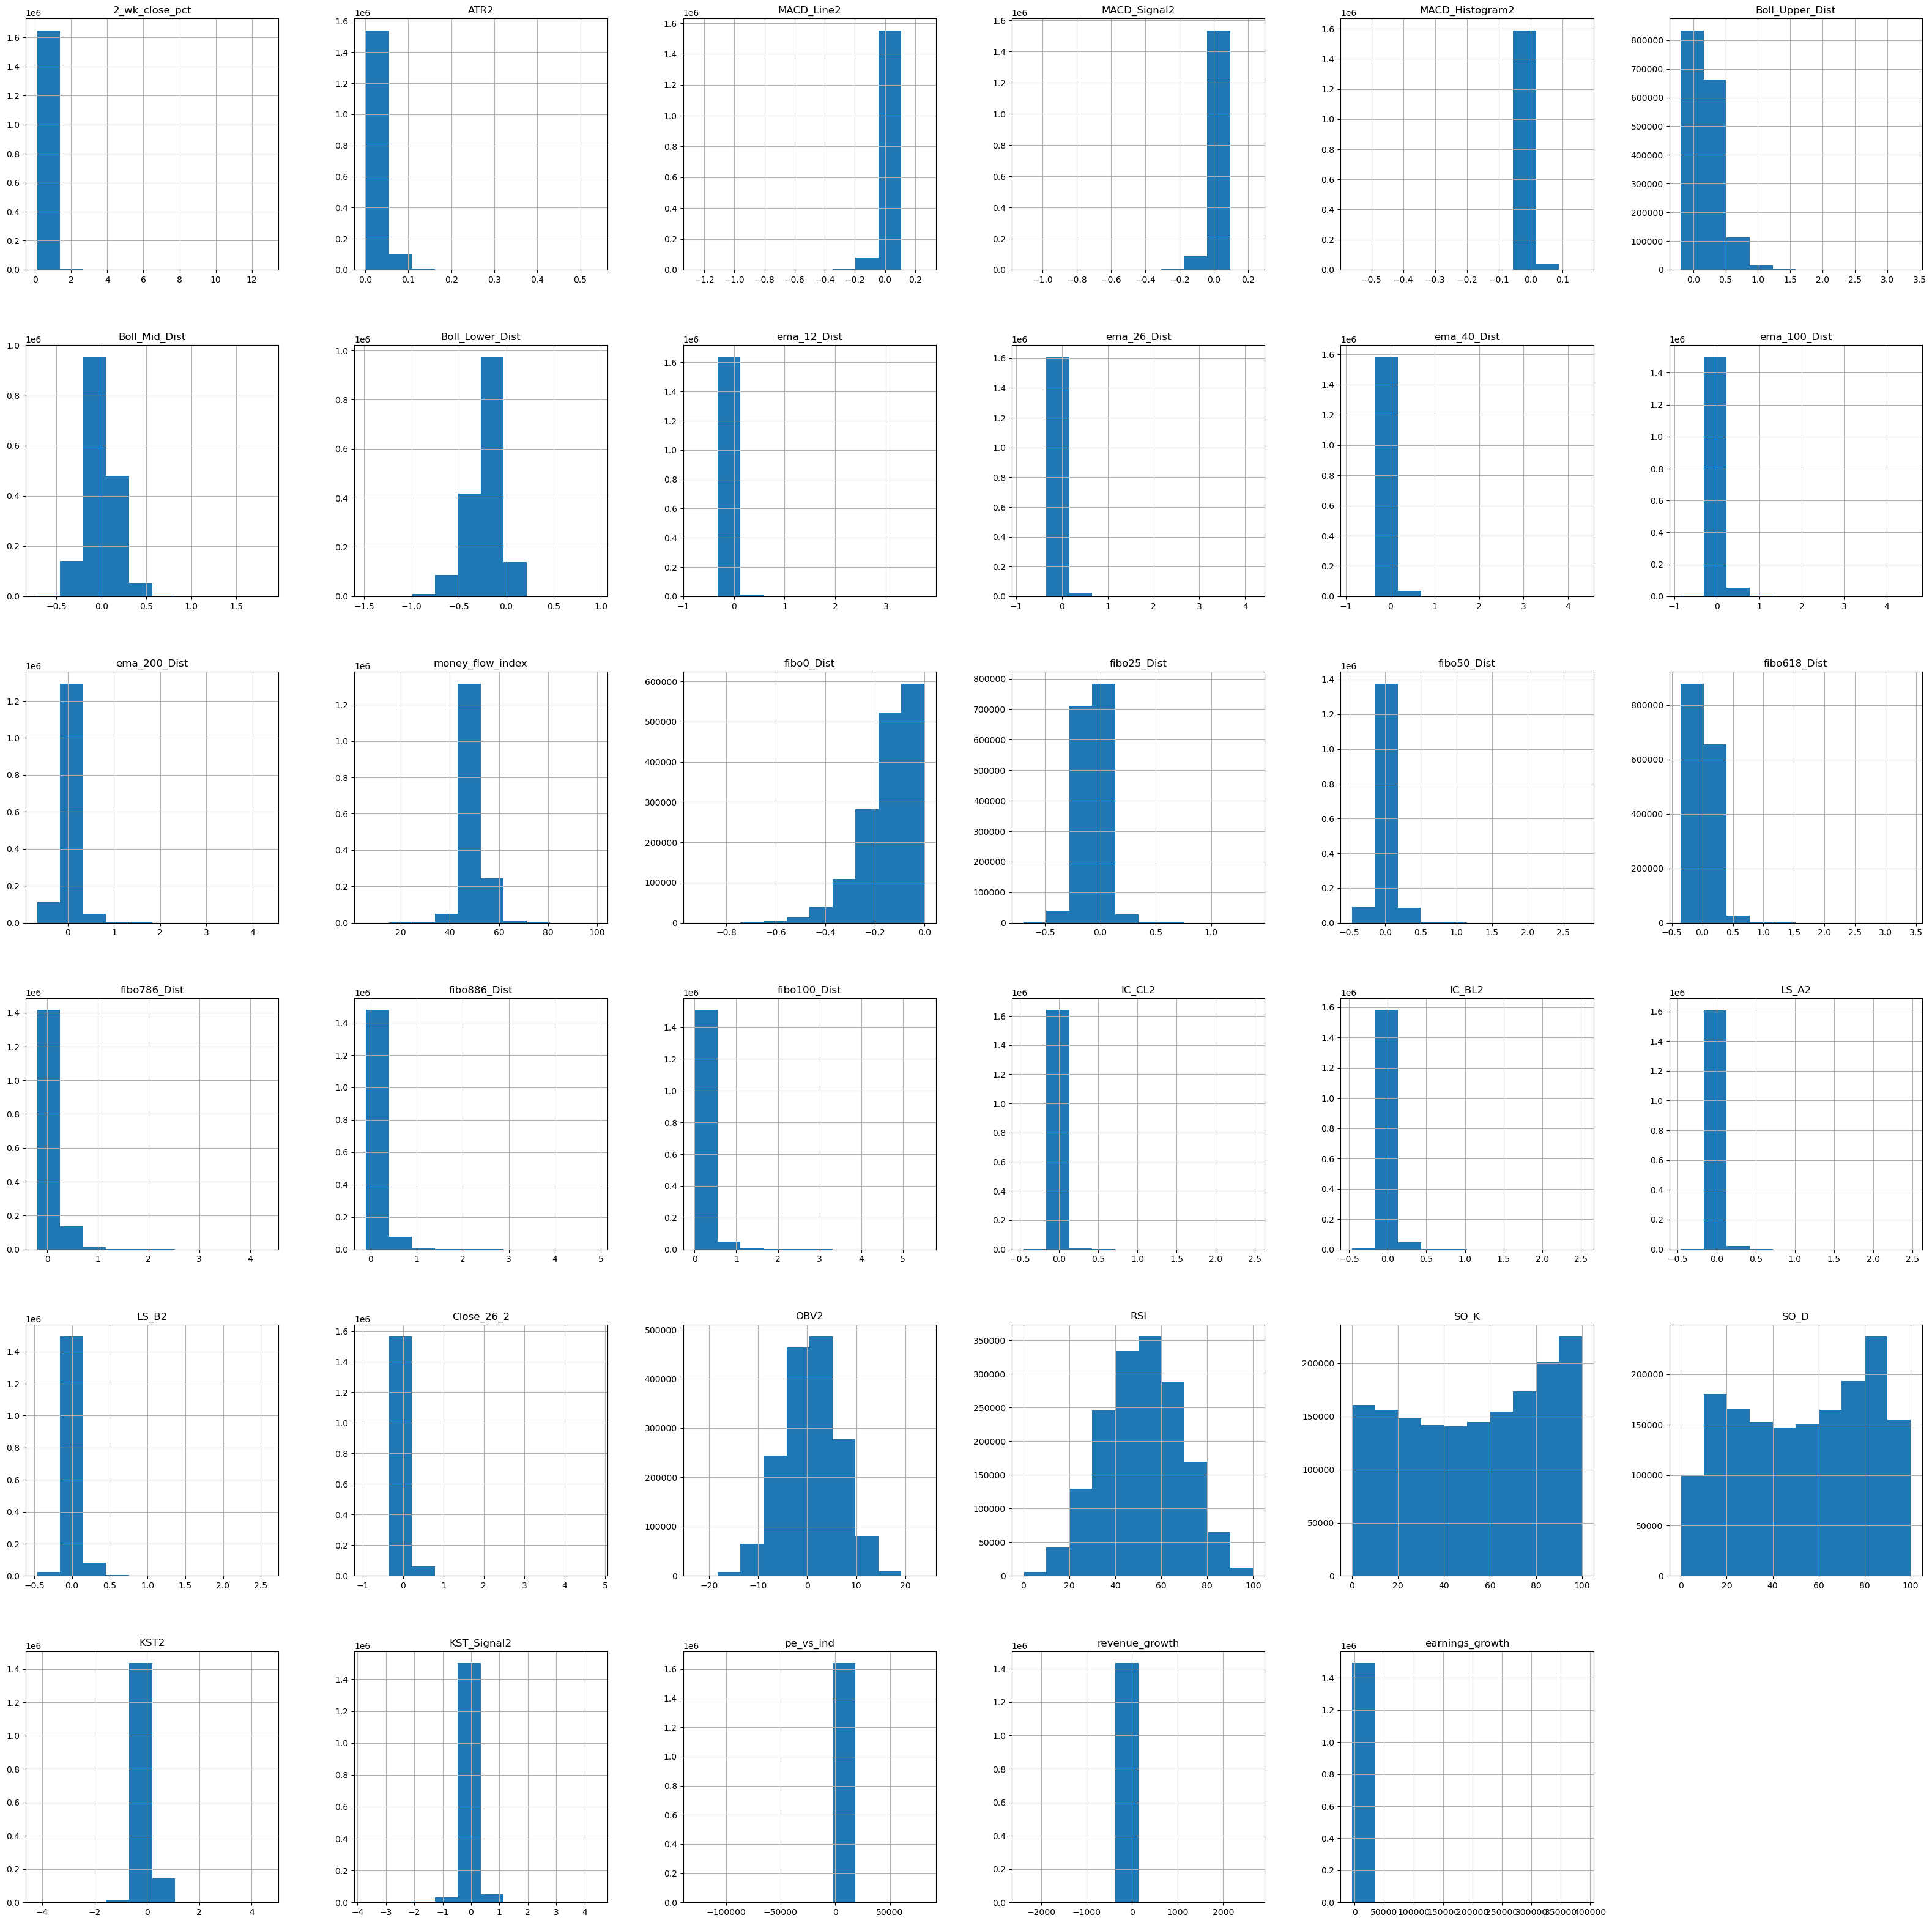

In [70]:
#hist = final_data_precursor['MACD_Line2'].hist(bins=10)

fig = plt.figure(figsize = (40,40))
ax = fig.gca()
hist_table.hist(ax = ax)

#### We see a lot of tall bars, this is indicative of outliers which should be removed

In [71]:
final_data_precursor = final_data_precursor[final_data_precursor['2_wk_close_pct'] < (final_data_precursor['2_wk_close_pct'].mean() + (final_data_precursor['2_wk_close_pct'].std()*3))]
final_data_precursor = final_data_precursor[final_data_precursor['2_wk_close_pct'] > (final_data_precursor['2_wk_close_pct'].mean() - (final_data_precursor['2_wk_close_pct'].std()*3))]                                         

## Variable Outlier Removal

In [72]:

hist_table2 = hist_table.dropna().copy()
hist_table3 = hist_table2[(np.abs(stats.zscore(hist_table2)) < 3).all(axis=1)].copy()

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\3285260031.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist_table3.hist(ax = ax)


array([[<Axes: title={'center': '2_wk_close_pct'}>,
        <Axes: title={'center': 'ATR2'}>,
        <Axes: title={'center': 'MACD_Line2'}>,
        <Axes: title={'center': 'MACD_Signal2'}>,
        <Axes: title={'center': 'MACD_Histogram2'}>,
        <Axes: title={'center': 'Boll_Upper_Dist'}>],
       [<Axes: title={'center': 'Boll_Mid_Dist'}>,
        <Axes: title={'center': 'Boll_Lower_Dist'}>,
        <Axes: title={'center': 'ema_12_Dist'}>,
        <Axes: title={'center': 'ema_26_Dist'}>,
        <Axes: title={'center': 'ema_40_Dist'}>,
        <Axes: title={'center': 'ema_100_Dist'}>],
       [<Axes: title={'center': 'ema_200_Dist'}>,
        <Axes: title={'center': 'money_flow_index'}>,
        <Axes: title={'center': 'fibo0_Dist'}>,
        <Axes: title={'center': 'fibo25_Dist'}>,
        <Axes: title={'center': 'fibo50_Dist'}>,
        <Axes: title={'center': 'fibo618_Dist'}>],
       [<Axes: title={'center': 'fibo786_Dist'}>,
        <Axes: title={'center': 'fibo886_Dist'}>

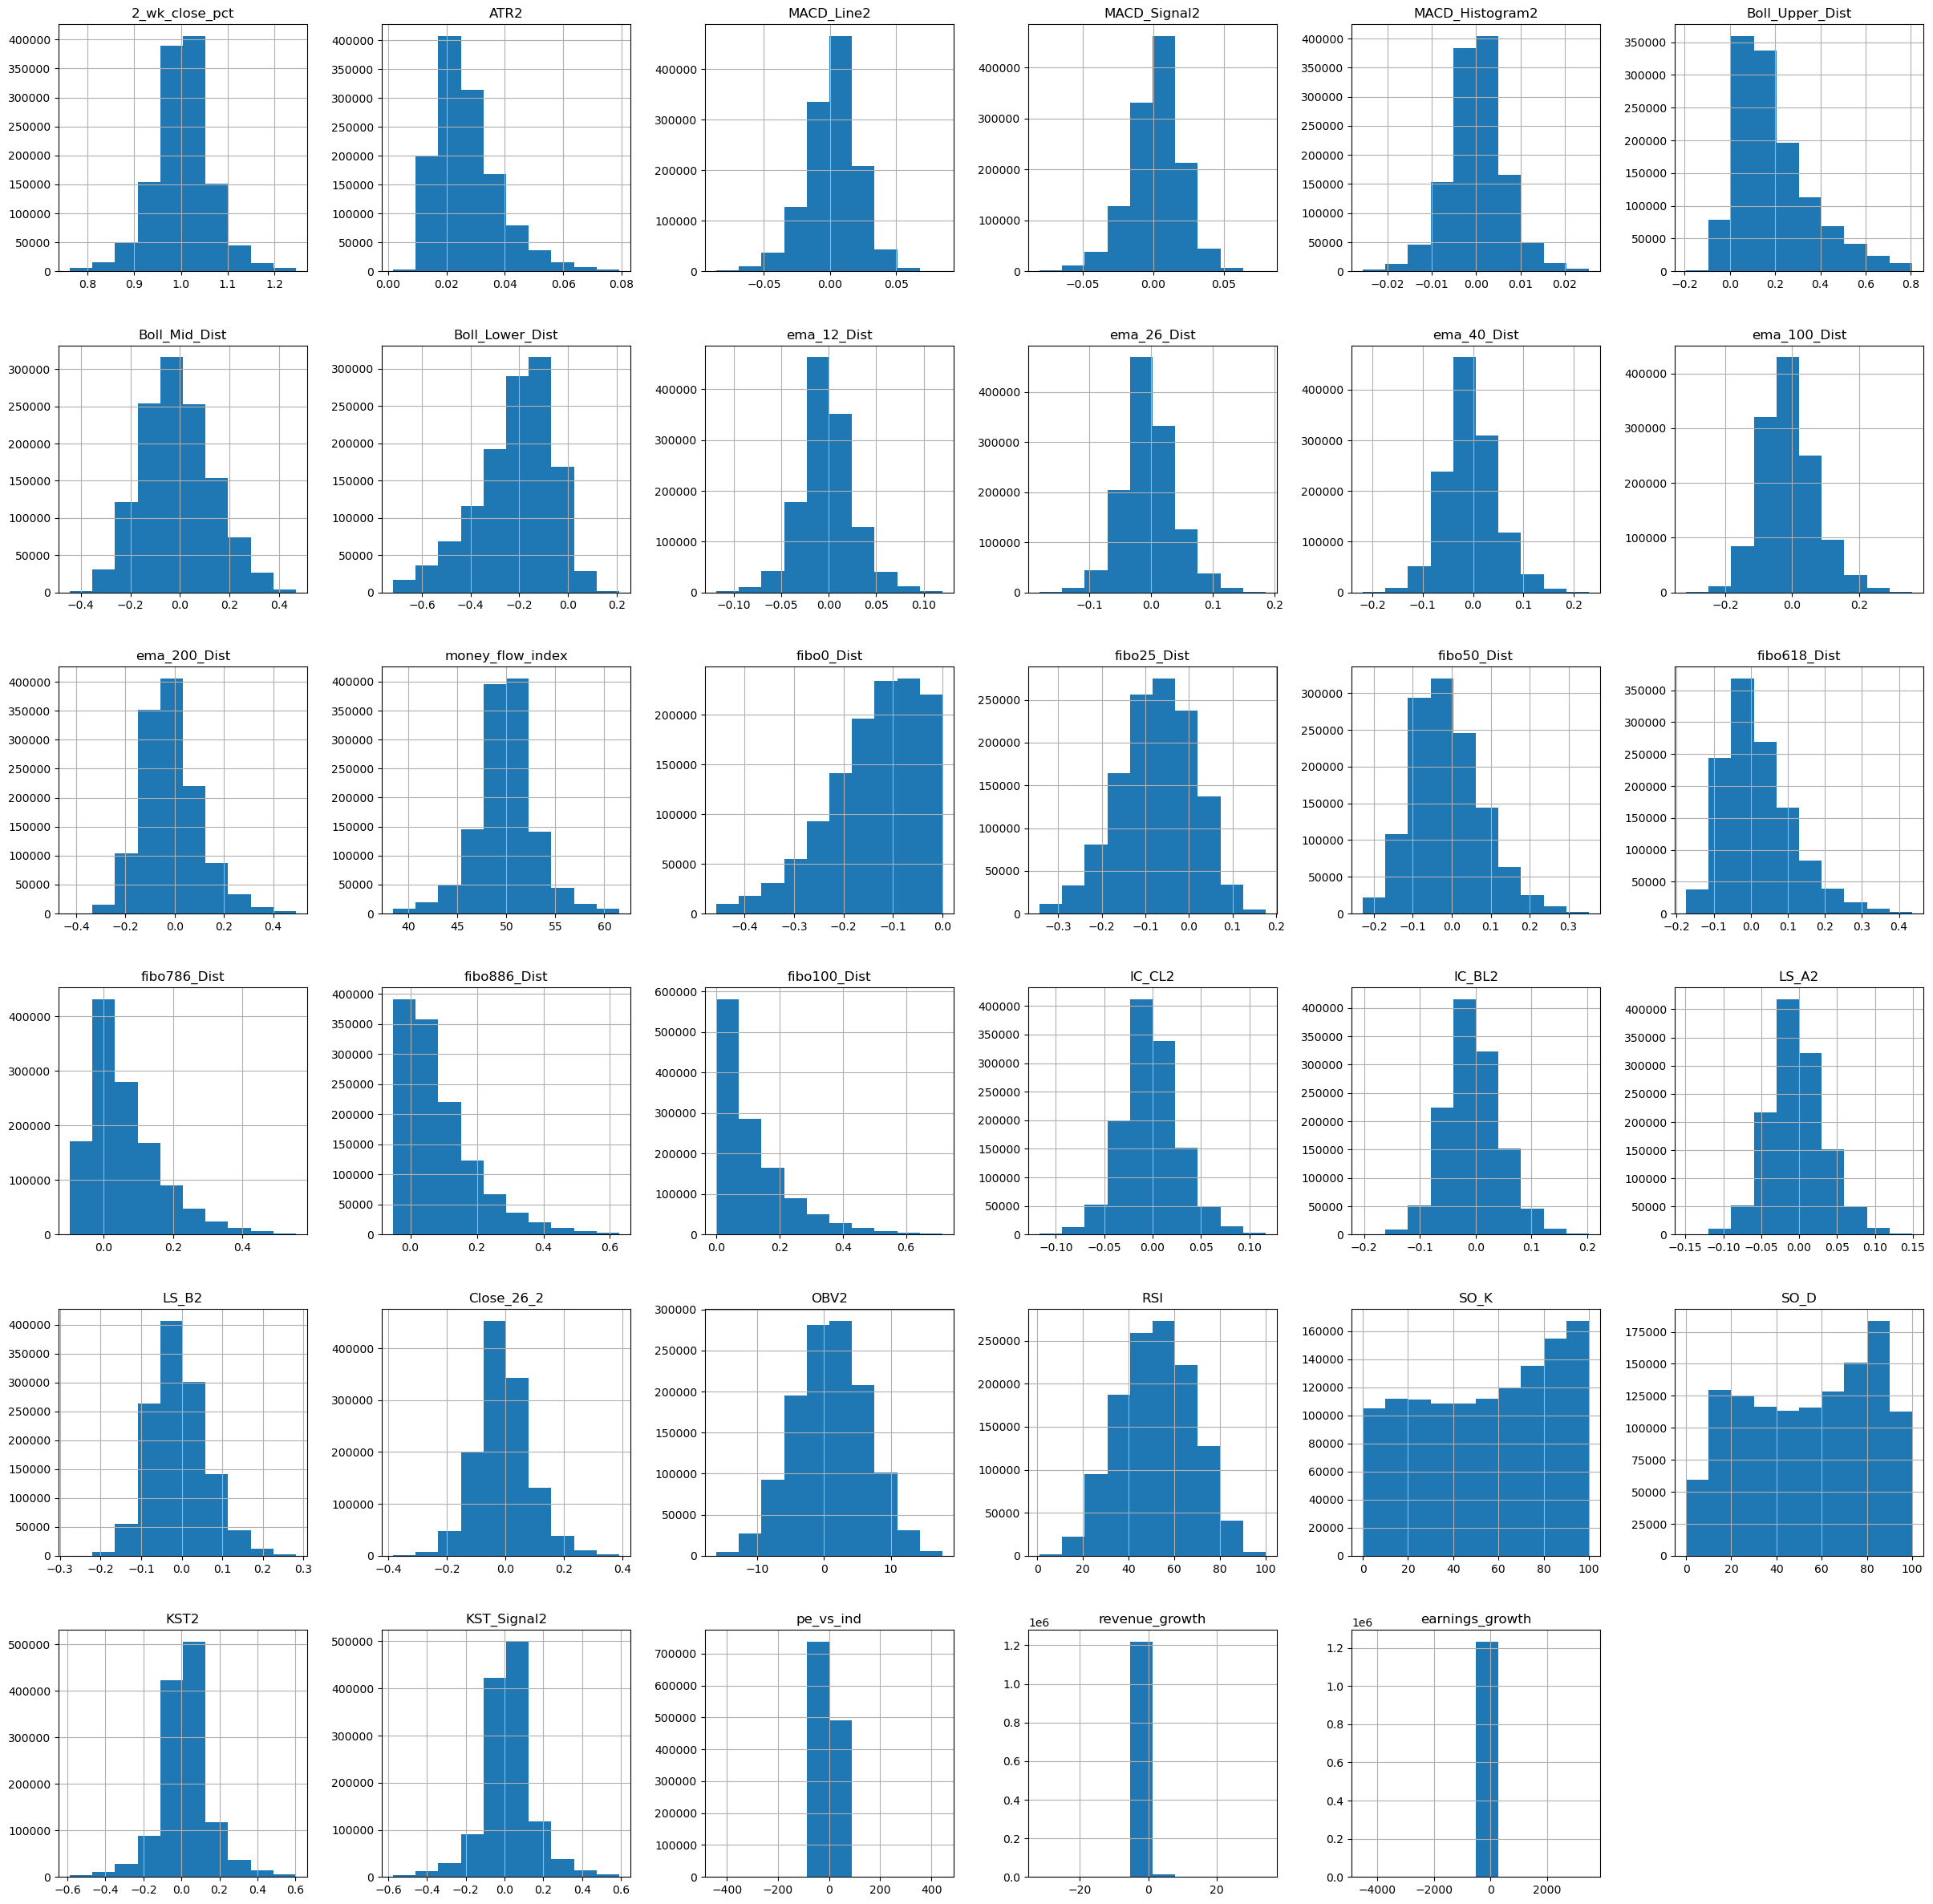

In [73]:
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
hist_table3.hist(ax = ax)

#### This looks significantly better.  We can go one step further and leverage min/max scaling

In [74]:
final_data_precursor[final_data_precursor['earnings_growth'] > 100]

,ticker,date2,Unnamed: 0.2,Unnamed: 0,open,high,low,close,volume,Unnamed: 0.1,...,Close_26_2,OBV,vol26_avg,OBV2,price_earnings,industry_price_earnings,pe_vs_ind,2_wk_close,2_wk_close_pct,3_Pct_Up_Flg
1644,PCRX,2015-10-01,206837,1018,41.16,41.33,38.00,39.55,1207300,70544,...,0.439949,-8186000.0,9.638692e+05,-8.492853,469.870917,235.707511,1.993449,38.79,0.980784,0
1649,PCRX,2015-10-02,207516,1018,38.89,40.85,38.46,40.74,908300,70544,...,0.422435,-7979400.0,9.718154e+05,-8.210819,484.008626,243.336653,1.989049,39.57,0.971281,0
1654,PCRX,2015-10-05,208195,1018,41.22,43.03,40.93,42.75,824300,70544,...,0.375906,-7753200.0,9.805154e+05,-7.907270,507.888286,249.636747,2.034509,41.13,0.962105,0
1659,PCRX,2015-10-06,208874,1018,42.08,42.08,36.42,36.62,2323900,70544,...,0.606499,-10383900.0,1.058096e+06,-9.813758,435.061264,235.445283,1.847823,41.31,1.128072,1
1664,PCRX,2015-10-07,209554,1019,36.49,39.49,35.78,38.54,1601000,70544,...,0.493254,-8050900.0,1.091519e+06,-7.375866,457.871685,244.242339,1.874661,39.43,1.023093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641450,MPC,2018-09-24,3351756,1211,83.94,86.36,83.70,85.79,6852900,60737,...,-0.106073,22386400.0,4.846777e+06,4.618822,37.324749,70.244352,0.531356,83.86,0.977503,0
1641455,MPC,2018-09-25,3352587,1212,86.67,88.45,84.94,85.05,7512300,60737,...,-0.093357,11499800.0,5.005931e+06,2.297235,37.002796,70.310851,0.526274,83.76,0.984832,0
1641460,MPC,2018-09-26,3353418,1212,84.71,85.21,82.45,84.53,7954900,60737,...,-0.068260,192200.0,5.182938e+06,0.037083,36.776559,70.213355,0.523783,80.65,0.954099,0
1641465,MPC,2018-09-27,3354249,1213,84.78,85.95,82.71,83.04,8087900,60737,...,-0.048531,-13629000.0,5.273500e+06,-2.584432,36.128303,70.370383,0.513402,78.73,0.948097,0


In [75]:
hist_table3['revenue_growth'].max()

34.30573248407644

## Feature Rescaling

In [76]:
final_data_precursor['2_wk_close_pct_scaled'] = (final_data_precursor['2_wk_close_pct'] - 
                                       final_data_precursor['2_wk_close_pct'].min()) / (final_data_precursor['2_wk_close_pct'].max() - final_data_precursor['2_wk_close_pct'].min())

final_data_precursor['ATR2_scaled'] = (final_data_precursor['ATR2'] - 
                                       final_data_precursor['ATR2'].min()) / (final_data_precursor['ATR2'].max() - final_data_precursor['ATR2'].min())

final_data_precursor['MACD_Line_scaled'] = (final_data_precursor['MACD_Line2'] - 
                                       final_data_precursor['MACD_Line2'].min()) / (final_data_precursor['MACD_Line2'].max() - final_data_precursor['MACD_Line2'].min())

final_data_precursor['MACD_Signal_scaled'] = (final_data_precursor['MACD_Signal2'] - 
                                       final_data_precursor['MACD_Signal2'].min()) / (final_data_precursor['MACD_Signal2'].max() - final_data_precursor['MACD_Signal2'].min())

final_data_precursor['MACD_Histogram_scaled'] = (final_data_precursor['MACD_Histogram2'] - 
                                       final_data_precursor['MACD_Histogram2'].min()) / (final_data_precursor['MACD_Histogram2'].max() - final_data_precursor['MACD_Histogram2'].min())

final_data_precursor['Boll_Upper_scaled'] = (final_data_precursor['Boll_Upper_Dist'] - 
                                       final_data_precursor['Boll_Upper_Dist'].min()) / (final_data_precursor['Boll_Upper_Dist'].max() - final_data_precursor['Boll_Upper_Dist'].min())

final_data_precursor['Boll_Mid_scaled'] = (final_data_precursor['Boll_Mid_Dist'] - 
                                       final_data_precursor['Boll_Mid_Dist'].min()) / (final_data_precursor['Boll_Mid_Dist'].max() - final_data_precursor['Boll_Mid_Dist'].min())

final_data_precursor['Boll_Lower_scaled'] = (final_data_precursor['Boll_Lower_Dist'] - 
                                       final_data_precursor['Boll_Lower_Dist'].min()) / (final_data_precursor['Boll_Lower_Dist'].max() - final_data_precursor['Boll_Lower_Dist'].min())

final_data_precursor['ema_12_Dist_scaled'] = (final_data_precursor['ema_12_Dist'] - 
                                       final_data_precursor['ema_12_Dist'].min()) / (final_data_precursor['ema_12_Dist'].max() - final_data_precursor['ema_12_Dist'].min())

final_data_precursor['ema_26_Dist_scaled'] = (final_data_precursor['ema_26_Dist'] - 
                                       final_data_precursor['ema_26_Dist'].min()) / (final_data_precursor['ema_26_Dist'].max() - final_data_precursor['ema_26_Dist'].min())

final_data_precursor['ema_40_Dist_scaled'] = (final_data_precursor['ema_40_Dist'] - 
                                       final_data_precursor['ema_40_Dist'].min()) / (final_data_precursor['ema_40_Dist'].max() - final_data_precursor['ema_40_Dist'].min())

final_data_precursor['ema_100_Dist_scaled'] = (final_data_precursor['ema_100_Dist'] - 
                                       final_data_precursor['ema_100_Dist'].min()) / (final_data_precursor['ema_100_Dist'].max() - final_data_precursor['ema_100_Dist'].min())

final_data_precursor['ema_200_Dist_scaled'] = (final_data_precursor['ema_200_Dist'] - 
                                       final_data_precursor['ema_200_Dist'].min()) / (final_data_precursor['ema_200_Dist'].max() - final_data_precursor['ema_200_Dist'].min())

final_data_precursor['money_flow_index_scaled'] = (final_data_precursor['money_flow_index'] - 
                                       final_data_precursor['money_flow_index'].min()) / (final_data_precursor['money_flow_index'].max() - final_data_precursor['money_flow_index'].min())

final_data_precursor['fibo0_Dist_scaled'] = (final_data_precursor['fibo0_Dist'] - 
                                       final_data_precursor['fibo0_Dist'].min()) / (final_data_precursor['fibo0_Dist'].max() - final_data_precursor['fibo0_Dist'].min())

final_data_precursor['fibo25_Dist_scaled'] = (final_data_precursor['fibo25_Dist'] - 
                                       final_data_precursor['fibo25_Dist'].min()) / (final_data_precursor['fibo25_Dist'].max() - final_data_precursor['fibo25_Dist'].min())

final_data_precursor['fibo50_Dist_scaled'] = (final_data_precursor['fibo50_Dist'] - 
                                       final_data_precursor['fibo50_Dist'].min()) / (final_data_precursor['fibo50_Dist'].max() - final_data_precursor['fibo50_Dist'].min())

final_data_precursor['fibo618_Dist_scaled'] = (final_data_precursor['fibo618_Dist'] - 
                                       final_data_precursor['fibo618_Dist'].min()) / (final_data_precursor['fibo618_Dist'].max() - final_data_precursor['fibo618_Dist'].min())

final_data_precursor['fibo786_Dist_scaled'] = (final_data_precursor['fibo786_Dist'] - 
                                       final_data_precursor['fibo786_Dist'].min()) / (final_data_precursor['fibo786_Dist'].max() - final_data_precursor['fibo786_Dist'].min())

final_data_precursor['fibo886_Dist_scaled'] = (final_data_precursor['fibo886_Dist'] - 
                                       final_data_precursor['fibo886_Dist'].min()) / (final_data_precursor['fibo886_Dist'].max() - final_data_precursor['fibo886_Dist'].min())

final_data_precursor['fibo100_Dist_scaled'] = (final_data_precursor['fibo100_Dist'] - 
                                       final_data_precursor['fibo100_Dist'].min()) / (final_data_precursor['fibo100_Dist'].max() - final_data_precursor['fibo100_Dist'].min())

final_data_precursor['IC_CL2_scaled'] = (final_data_precursor['IC_CL2'] - 
                                       final_data_precursor['IC_CL2'].min()) / (final_data_precursor['IC_CL2'].max() - final_data_precursor['IC_CL2'].min())


final_data_precursor['IC_BL2_scaled'] = (final_data_precursor['IC_BL2'] - 
                                       final_data_precursor['IC_BL2'].min()) / (final_data_precursor['IC_BL2'].max() - final_data_precursor['IC_BL2'].min())


final_data_precursor['LS_A2_scaled'] = (final_data_precursor['LS_A2'] - 
                                       final_data_precursor['LS_A2'].min()) / (final_data_precursor['LS_A2'].max() - final_data_precursor['LS_A2'].min())


final_data_precursor['LS_B2_scaled'] = (final_data_precursor['LS_B2'] - 
                                       final_data_precursor['LS_B2'].min()) / (final_data_precursor['LS_B2'].max() - final_data_precursor['LS_B2'].min())

final_data_precursor['Close_26_2_scaled'] = (final_data_precursor['Close_26_2'] - 
                                       final_data_precursor['Close_26_2'].min()) / (final_data_precursor['Close_26_2'].max() - final_data_precursor['Close_26_2'].min())

final_data_precursor['OBV2_scaled'] = (final_data_precursor['OBV2'] - 
                                       final_data_precursor['OBV2'].min()) / (final_data_precursor['OBV2'].max() - final_data_precursor['OBV2'].min())


final_data_precursor['RSI_scaled'] = (final_data_precursor['RSI'] - 
                                       final_data_precursor['RSI'].min()) / (final_data_precursor['RSI'].max() - final_data_precursor['RSI'].min())

final_data_precursor['SO_K_scaled'] = (final_data_precursor['SO_K'] - 
                                       final_data_precursor['SO_K'].min()) / (final_data_precursor['SO_K'].max() - final_data_precursor['SO_K'].min())

final_data_precursor['SO_D_scaled'] = (final_data_precursor['SO_D'] - 
                                       final_data_precursor['SO_D'].min()) / (final_data_precursor['SO_D'].max() - final_data_precursor['SO_D'].min())

final_data_precursor['KST_scaled'] = (final_data_precursor['KST2'] - 
                                       final_data_precursor['KST2'].min()) / (final_data_precursor['KST2'].max() - final_data_precursor['KST2'].min())

final_data_precursor['KST_Signal_scaled'] = (final_data_precursor['KST_Signal2'] - 
                                       final_data_precursor['KST_Signal2'].min()) / (final_data_precursor['KST_Signal2'].max() - final_data_precursor['KST_Signal2'].min())

In [77]:
final_data_precursor.replace([np.inf, -np.inf], np.nan, inplace=True)
final_data_precursor = final_data_precursor.dropna()

In [78]:
final_data_precursor['earnings_decile'] = pd.qcut(final_data_precursor['earnings_growth'], 10, labels=False)
final_data_precursor['revenue_decile'] = pd.qcut(final_data_precursor['revenue_growth'], 10, labels=False)
final_data_precursor['pe_vs_ind_decile'] = pd.qcut(final_data_precursor['pe_vs_ind'], 10, labels=False)

# Signal Transformation to Indicators

## EMA Crossover

In [79]:
final_data_precursor = final_data_precursor.set_index(['ticker','date2'])

In [80]:

final_data_precursor['ema_12v26'] = np.where(final_data_precursor['ema_12'] > final_data_precursor['ema_26'],1,-1)
final_data_precursor['ema_26v40'] = np.where(final_data_precursor['ema_26'] > final_data_precursor['ema_40'],1,-1)
final_data_precursor['ema_40v100'] = np.where(final_data_precursor['ema_40'] > final_data_precursor['ema_100'],1,-1)
final_data_precursor['ema_100v200'] = np.where(final_data_precursor['ema_100'] > final_data_precursor['ema_200'],1,-1)

final_data_precursor['ema_12v26_roll5'] = final_data_precursor['ema_12v26'].groupby(level=["ticker"]).rolling(min_periods=5, window=5).sum().droplevel(0,axis = 0)
final_data_precursor['ema_12v26_roll10'] = final_data_precursor['ema_12v26'].groupby(level=["ticker"]).rolling(min_periods=10, window=10).sum().droplevel(0,axis = 0)

final_data_precursor['ema_26v40_roll5'] = final_data_precursor['ema_26v40'].groupby(level=["ticker"]).rolling(min_periods=5, window=5).sum().droplevel(0,axis = 0)
final_data_precursor['ema_26v40_roll10'] = final_data_precursor['ema_26v40'].groupby(level=["ticker"]).rolling(min_periods=10, window=10).sum().droplevel(0,axis = 0)

final_data_precursor['ema_40v100_roll5'] = final_data_precursor['ema_40v100'].groupby(level=["ticker"]).rolling(min_periods=5, window=5).sum().droplevel(0,axis = 0)
final_data_precursor['ema_40v100_roll10'] = final_data_precursor['ema_40v100'].groupby(level=["ticker"]).rolling(min_periods=10, window=10).sum().droplevel(0,axis = 0)

final_data_precursor['ema_100v200_roll5'] = final_data_precursor['ema_100v200'].groupby(level=["ticker"]).rolling(min_periods=5, window=5).sum().droplevel(0,axis = 0)
final_data_precursor['ema_100v200_roll10'] = final_data_precursor['ema_100v200'].groupby(level=["ticker"]).rolling(min_periods=10, window=10).sum().droplevel(0,axis = 0)


final_data_precursor['ema_12v26_cross_up_flg'] = np.where((final_data_precursor['ema_12v26_roll5'] > 0) & (final_data_precursor['ema_12v26_roll5'] > final_data_precursor['ema_12v26_roll10']),1,0)
final_data_precursor['ema_12v26_cross_dn_flg'] = np.where((final_data_precursor['ema_12v26_roll5'] < 0) & (final_data_precursor['ema_12v26_roll5'] < final_data_precursor['ema_12v26_roll10']),1,0)

final_data_precursor['ema_26v40_cross_up_flg'] = np.where((final_data_precursor['ema_26v40_roll5'] > 0) & (final_data_precursor['ema_26v40_roll5'] > final_data_precursor['ema_26v40_roll10']),1,0)
final_data_precursor['ema_26v40_cross_dn_flg'] = np.where((final_data_precursor['ema_26v40_roll5'] < 0) & (final_data_precursor['ema_26v40_roll5'] < final_data_precursor['ema_26v40_roll10']),1,0)

final_data_precursor['ema_40v100_cross_up_flg'] = np.where((final_data_precursor['ema_40v100_roll5'] > 0) & (final_data_precursor['ema_40v100_roll5'] > final_data_precursor['ema_40v100_roll10']),1,0)
final_data_precursor['ema_40v100_cross_dn_flg'] = np.where((final_data_precursor['ema_40v100_roll5'] < 0) & (final_data_precursor['ema_40v100_roll5'] < final_data_precursor['ema_40v100_roll10']),1,0)

final_data_precursor['ema_100v200_cross_up_flg'] = np.where((final_data_precursor['ema_100v200_roll5'] > 0) & (final_data_precursor['ema_100v200_roll5'] > final_data_precursor['ema_100v200_roll10']),1,0)
final_data_precursor['ema_100v200_cross_dn_flg'] = np.where((final_data_precursor['ema_100v200_roll5'] < 0) & (final_data_precursor['ema_100v200_roll5'] < final_data_precursor['ema_100v200_roll10']),1,0)


final_data_precursor = final_data_precursor.drop(columns = ['ema_12v26','ema_26v40', 'ema_40v100','ema_100v200', \
                                                           'ema_12v26_roll5','ema_12v26_roll10' \
                                                           ,'ema_26v40_roll5','ema_26v40_roll10' \
                                                           ,'ema_40v100_roll5','ema_40v100_roll10' \
                                                           ,'ema_100v200_roll5','ema_100v200_roll10'])

# Data Modelling

## Close Ranking

In [81]:
final_data_precursor.replace([np.inf, -np.inf], np.nan, inplace=True)
final_data = final_data_precursor.dropna()
final_data = final_data[['2_wk_close_pct_scaled','ATR2_scaled','MACD_Line_scaled','MACD_Signal_scaled' \
                                        ,'MACD_Histogram_scaled','Boll_Upper_scaled','Boll_Mid_scaled','Boll_Lower_scaled' \
                                        ,'ema_12_Dist_scaled','ema_26_Dist_scaled','ema_40_Dist_scaled','ema_100_Dist_scaled' \
                                        ,'ema_200_Dist_scaled','money_flow_index_scaled','fibo0_Dist_scaled','fibo25_Dist_scaled' \
                                        ,'fibo50_Dist_scaled','fibo618_Dist_scaled','fibo786_Dist_scaled','fibo886_Dist_scaled' \
                                        ,'fibo100_Dist_scaled','IC_CL2_scaled','IC_BL2_scaled','LS_A2_scaled' \
                                        ,'LS_B2_scaled','Close_26_2_scaled','OBV2_scaled','RSI_scaled' \
                                        ,'SO_K_scaled','SO_D_scaled','KST_scaled','KST_Signal_scaled','pe_vs_ind_decile' \
                                        ,'revenue_decile', 'earnings_decile','earnings_1wk', 'earnings_2wk', 'earnings_4wk','earnings_8wk'
                                       ]]



#### Remove entries where earnings are within decision window as earnings are unpredicable

In [82]:
final_data = final_data[final_data['earnings_8wk'] == 1]

## Determining Correllation

In [83]:
final_data

2_wk_close_pct_scaled  ATR2_scaled  MACD_Line_scaled  \
ticker date2                                                              
A      2015-05-01               0.459051     0.024598          0.828571   
       2015-05-04               0.483295     0.023732          0.828228   
       2015-05-05               0.488178     0.023926          0.827518   
       2015-05-06               0.500416     0.024526          0.826976   
       2015-05-07               0.474787     0.024419          0.826841   
...                                  ...          ...               ...   
WU     2020-11-11               0.604712     0.074241          0.820867   
V      2020-11-12               0.476306     0.060903          0.836191   
WU     2020-11-12               0.617170     0.074341          0.821009   
V      2020-11-13               0.447094     0.058046          0.837683   
WU     2020-11-13               0.580202     0.070016          0.822322   

                   MACD_Signal_scaled  MACD_Histogram_scaled  \
ticker date2                                                   
A      2015-05-01            0.832417               0.770494   
       2015-05-04            0.831635               0.771225   
       2015-05-05            0.830874               0.771140   
       2015-05-06            0.830123               0.771390   
       2015-05-07            0.829487               0.772288   
...                               ...                    ...   
WU     2020-11-11            0.816697               0.783446   
V      2020-11-12            0.827495               0.795731   
WU     2020-11-12            0.817347               0.782539   
V      2020-11-13            0.829864               0.794478   
WU     2020-11-13            0.818409               0.783336   

                   Boll_Upper_scaled  Boll_Mid_scaled  Boll_Lower_scaled  \
ticker date2                                                               
A      2015-05-01           0.133694         0.322504           0.585278   
       2015-05-04           0.128816         0.316051           0.578830   
       2015-05-05           0.144606         0.333582           0.592626   
       2015-05-06           0.158202         0.338664           0.583411   
       2015-05-07           0.148737         0.322888           0.564045   
...                              ...              ...                ...   
WU     2020-11-11           0.111720         0.285603           0.539738   
V      2020-11-12           0.086254         0.213942           0.426093   
WU     2020-11-12           0.113284         0.290734           0.548256   
V      2020-11-13           0.082816         0.205115           0.412537   
WU     2020-11-13           0.094947         0.270551           0.532605   

                   ema_12_Dist_scaled  ema_26_Dist_scaled  ...  SO_D_scaled  \
ticker date2                                               ...                
A      2015-05-01            0.173003            0.170086  ...     0.213526   
       2015-05-04            0.172199            0.169463  ...     0.245831   
       2015-05-05            0.173591            0.170936  ...     0.277830   
       2015-05-06            0.173190            0.170739  ...     0.246816   
       2015-05-07            0.171903            0.169618  ...     0.230126   
...                               ...                 ...  ...          ...   
WU     2020-11-11            0.170740            0.170382  ...     0.671996   
V      2020-11-12            0.164240            0.159857  ...     0.837932   
WU     2020-11-12            0.172297            0.171745  ...     0.629720   
V      2020-11-13            0.163369            0.158616  ...     0.813378   
WU     2020-11-13            0.168735            0.168130  ...     0.605896   

                   KST_scaled  KST_Signal_scaled  pe_vs_ind_decile  \
ticker date2                                                         
A      2015-05-01    0.467744           0.444195     

In [84]:
#final_data = final_data[(np.abs(stats.zscore(final_data)) < 3).all(axis=1)].copy()

In [85]:
Corr_Output = final_data.corr(method='pearson')

In [86]:
Corr_Output2 = Corr_Output[["2_wk_close_pct_scaled"]]

<Axes: >

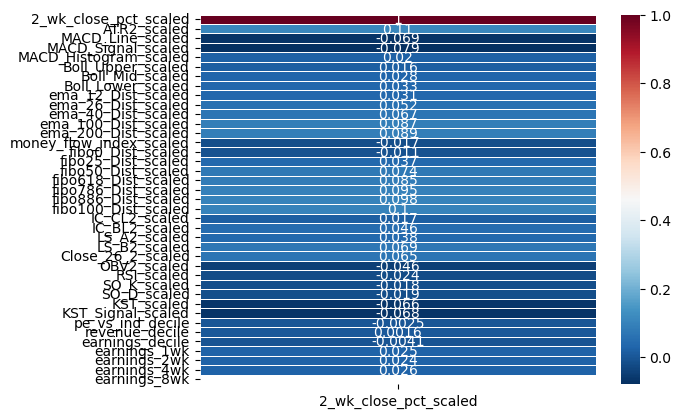

In [87]:
sns.heatmap(Corr_Output2, 
            xticklabels=Corr_Output2.columns,
            yticklabels=Corr_Output.index,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

<Axes: >

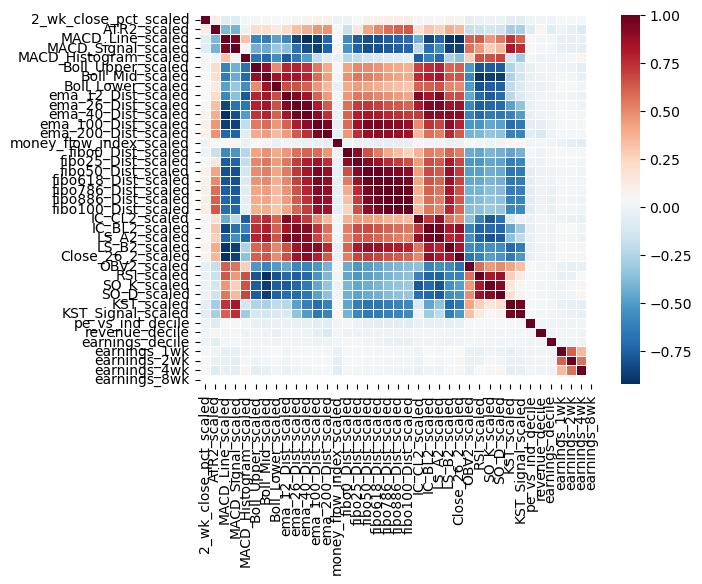

In [88]:
sns.heatmap(Corr_Output, 
            xticklabels=Corr_Output.columns,
            yticklabels=Corr_Output.index,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

In [89]:
Corr_Output.to_csv("F:/Stocks/corr_data.csv")

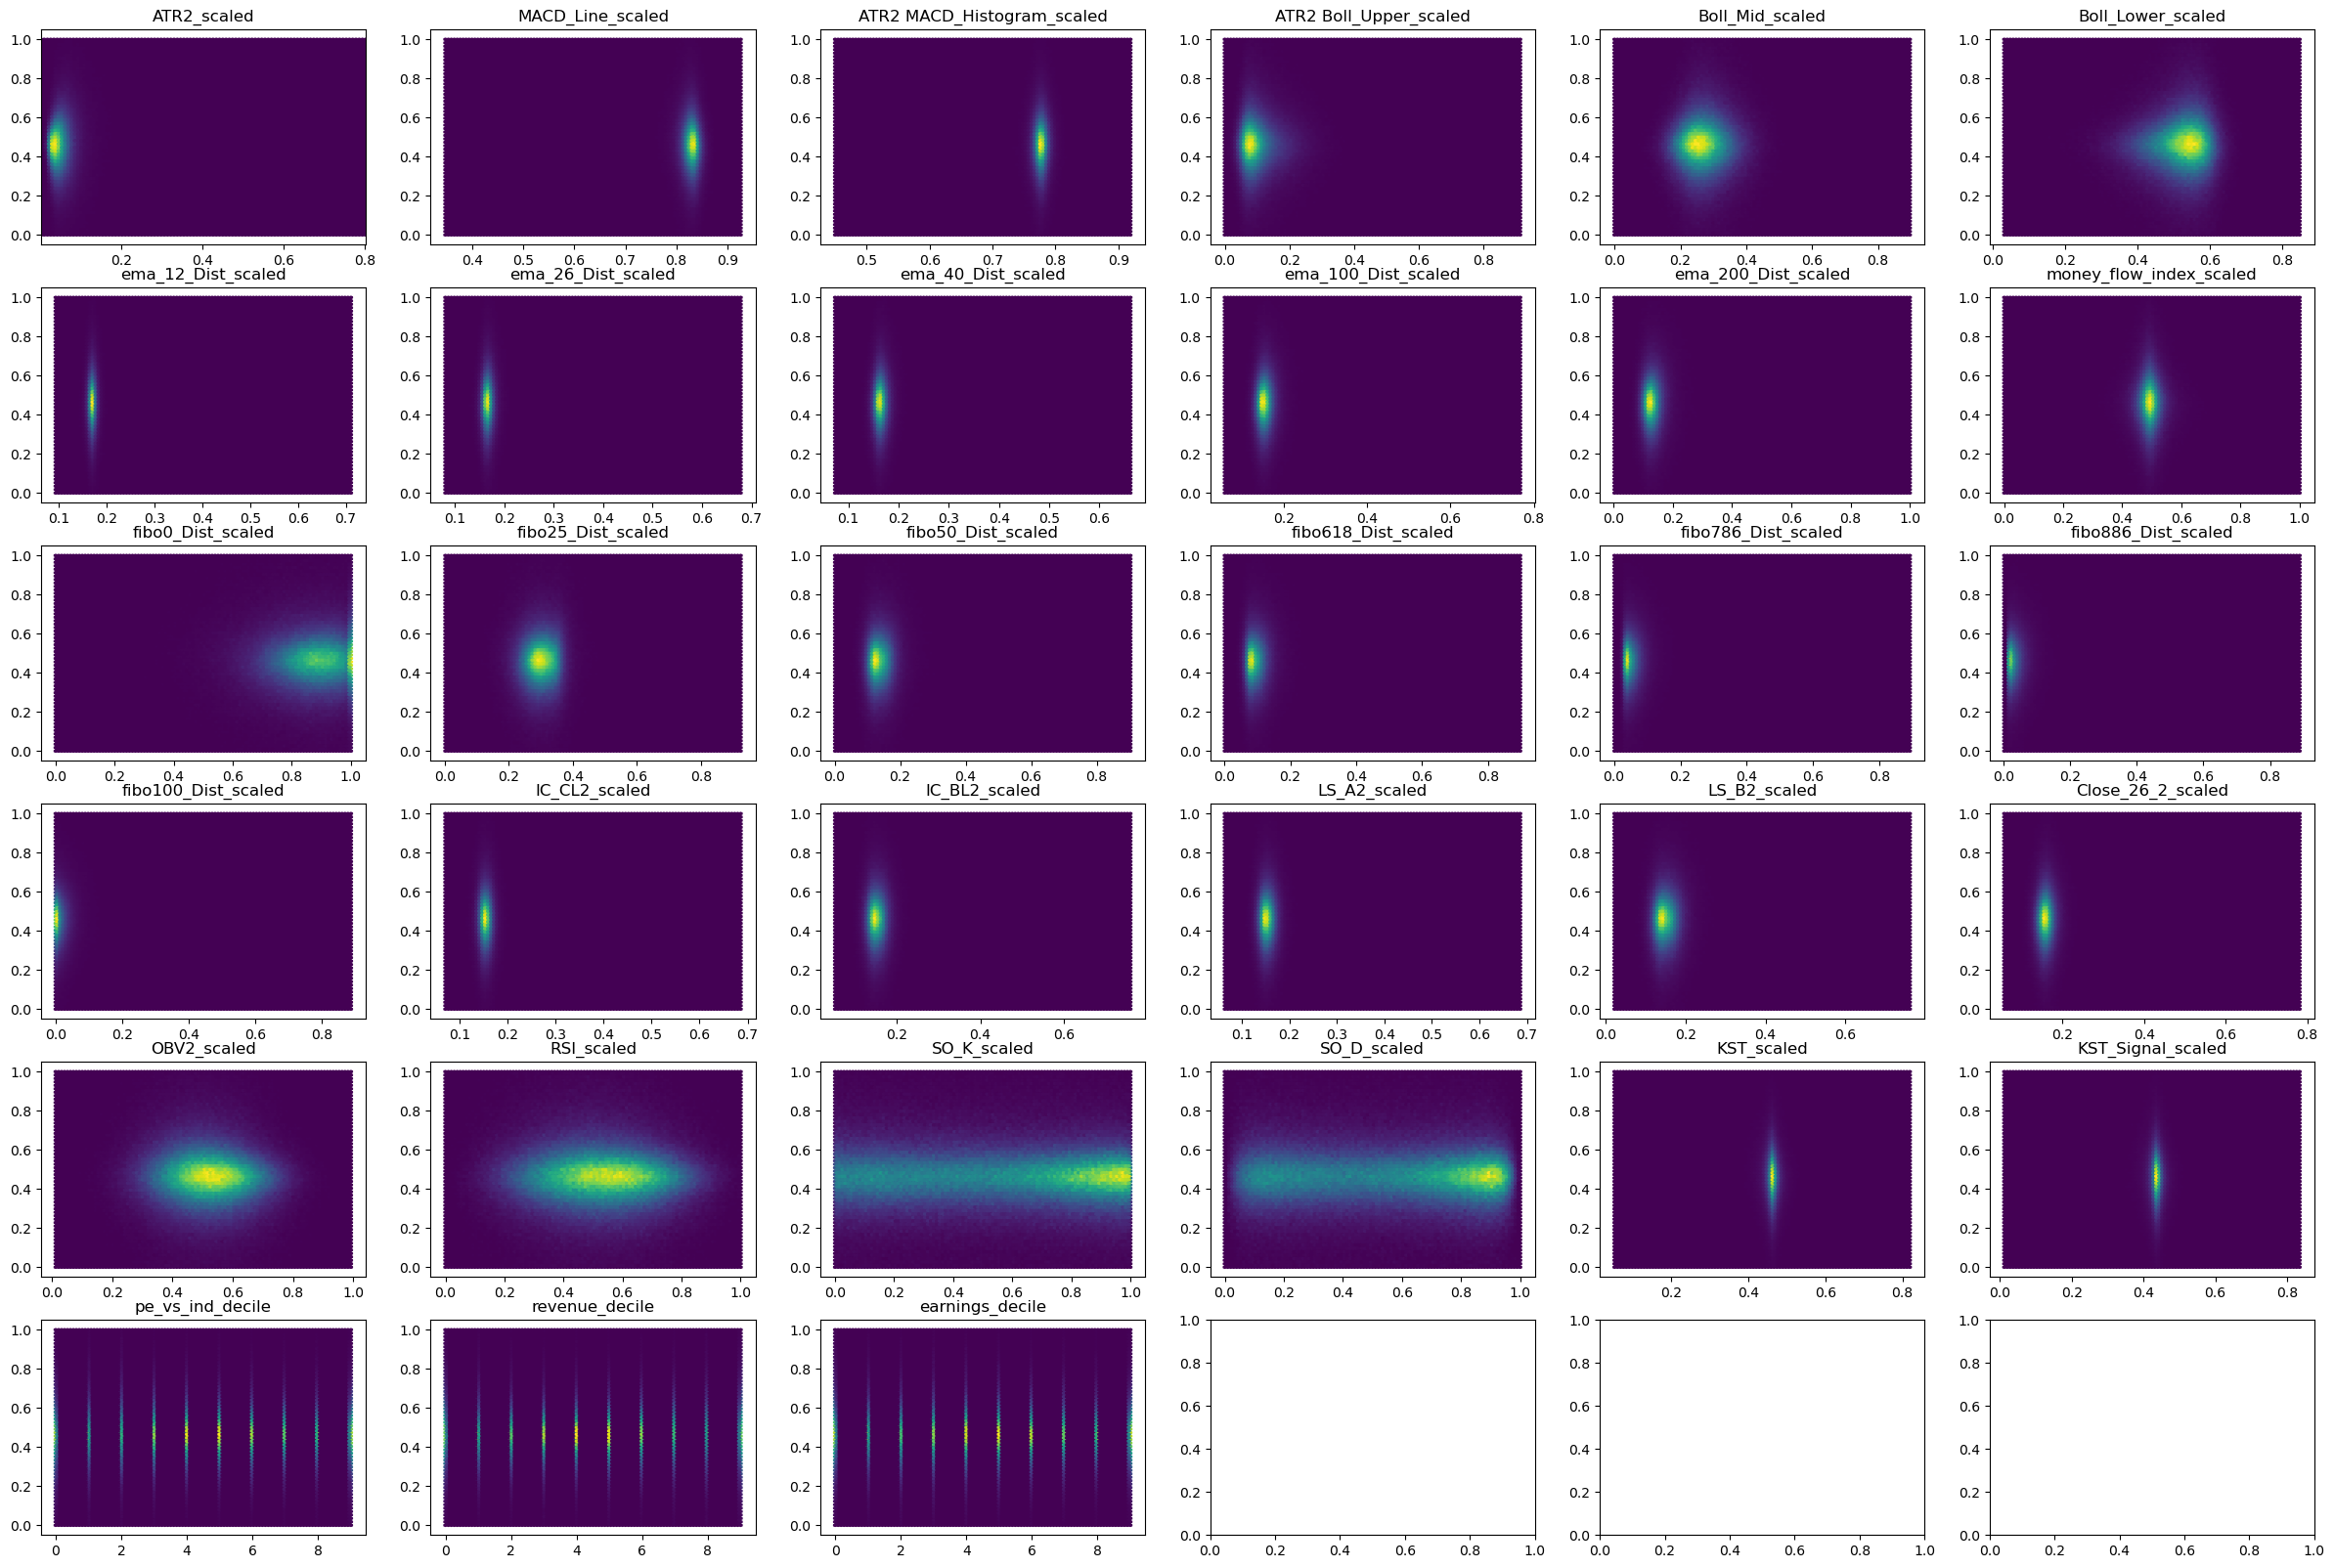

In [90]:
fig, axes = plt.subplots(6,6, figsize=(30,20))
axes[0, 0].hexbin(x=final_data['ATR2_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[0, 0].title.set_text('ATR2_scaled')
axes[0, 0].set_xlim([final_data['ATR2_scaled'].min(), final_data['ATR2_scaled'].max()])
axes[0, 1].hexbin(x=final_data['MACD_Line_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[0, 1].title.set_text('MACD_Line_scaled')
axes[0, 2].hexbin(x=final_data['MACD_Histogram_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[0, 2].title.set_text('ATR2 MACD_Histogram_scaled')
axes[0, 3].hexbin(x=final_data['Boll_Upper_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[0, 3].title.set_text('ATR2 Boll_Upper_scaled')
axes[0, 4].hexbin(x=final_data['Boll_Mid_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[0, 4].title.set_text('Boll_Mid_scaled')
axes[0, 5].hexbin(x=final_data['Boll_Lower_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[0, 5].title.set_text('Boll_Lower_scaled')
axes[1, 0].hexbin(x=final_data['ema_12_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[1, 0].title.set_text('ema_12_Dist_scaled')
axes[1, 1].hexbin(x=final_data['ema_26_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[1, 1].title.set_text('ema_26_Dist_scaled')
axes[1, 2].hexbin(x=final_data['ema_40_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[1, 2].title.set_text('ema_40_Dist_scaled')
axes[1, 3].hexbin(x=final_data['ema_100_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[1, 3].title.set_text('ema_100_Dist_scaled')
axes[1, 4].hexbin(x=final_data['ema_200_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[1, 4].title.set_text('ema_200_Dist_scaled')
axes[1, 5].hexbin(x=final_data['money_flow_index_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[1, 5].title.set_text('money_flow_index_scaled')
axes[2, 0].hexbin(x=final_data['fibo0_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[2, 0].title.set_text('fibo0_Dist_scaled')
axes[2, 1].hexbin(x=final_data['fibo25_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[2, 1].title.set_text('fibo25_Dist_scaled')
axes[2, 2].hexbin(x=final_data['fibo50_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[2, 2].title.set_text('fibo50_Dist_scaled')
axes[2, 3].hexbin(x=final_data['fibo618_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[2, 3].title.set_text('fibo618_Dist_scaled')
axes[2, 4].hexbin(x=final_data['fibo786_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[2, 4].title.set_text('fibo786_Dist_scaled')
axes[2, 5].hexbin(x=final_data['fibo886_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[2, 5].title.set_text('fibo886_Dist_scaled')
axes[3, 0].hexbin(x=final_data['fibo100_Dist_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[3, 0].title.set_text('fibo100_Dist_scaled')
axes[3, 1].hexbin(x=final_data['IC_CL2_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[3, 1].title.set_text('IC_CL2_scaled')
axes[3, 2].hexbin(x=final_data['IC_BL2_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[3, 2].title.set_text('IC_BL2_scaled')
axes[3, 3].hexbin(x=final_data['LS_A2_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[3, 3].title.set_text('LS_A2_scaled')
axes[3, 4].hexbin(x=final_data['LS_B2_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[3, 4].title.set_text('LS_B2_scaled')
axes[3, 5].hexbin(x=final_data['Close_26_2_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[3, 5].title.set_text('Close_26_2_scaled')
axes[4, 0].hexbin(x=final_data['OBV2_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[4, 0].title.set_text('OBV2_scaled')
axes[4, 1].hexbin(x=final_data['RSI_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[4, 1].title.set_text('RSI_scaled')
axes[4, 2].hexbin(x=final_data['SO_K_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[4, 2].title.set_text('SO_K_scaled')
axes[4, 3].hexbin(x=final_data['SO_D_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[4, 3].title.set_text('SO_D_scaled')
axes[4, 4].hexbin(x=final_data['KST_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[4, 4].title.set_text('KST_scaled')
axes[4, 5].hexbin(x=final_data['KST_Signal_scaled'], y=final_data['2_wk_close_pct_scaled'])
axes[4, 5].title.set_text('KST_Signal_scaled')
axes[5, 0].hexbin(x=final_data['pe_vs_ind_decile'], y=final_data['2_wk_close_pct_scaled'])
axes[5, 0].title.set_text('pe_vs_ind_decile')
axes[5, 1].hexbin(x=final_data['revenue_decile'], y=final_data['2_wk_close_pct_scaled'])
axes[5, 1].title.set_text('revenue_decile')
axes[5, 2].hexbin(x=final_data['earnings_decile'], y=final_data['2_wk_close_pct_scaled'])
axes[5, 2].title.set_text('earnings_decile')


#### Not seeing any positive or negative correlation with any distinct variables

## Test/Training Split

In [91]:
final_data.dtypes

2_wk_close_pct_scaled      float64
ATR2_scaled                float64
MACD_Line_scaled           float64
MACD_Signal_scaled         float64
MACD_Histogram_scaled      float64
Boll_Upper_scaled          float64
Boll_Mid_scaled            float64
Boll_Lower_scaled          float64
ema_12_Dist_scaled         float64
ema_26_Dist_scaled         float64
ema_40_Dist_scaled         float64
ema_100_Dist_scaled        float64
ema_200_Dist_scaled        float64
money_flow_index_scaled    float64
fibo0_Dist_scaled          float64
fibo25_Dist_scaled         float64
fibo50_Dist_scaled         float64
fibo618_Dist_scaled        float64
fibo786_Dist_scaled        float64
fibo886_Dist_scaled        float64
fibo100_Dist_scaled        float64
IC_CL2_scaled              float64
IC_BL2_scaled              float64
LS_A2_scaled               float64
LS_B2_scaled               float64
Close_26_2_scaled          float64
OBV2_scaled                float64
RSI_scaled                 float64
SO_K_scaled         

In [92]:
ema_flags = final_data_precursor[['ema_12v26_cross_up_flg', 'ema_12v26_cross_dn_flg', 'ema_26v40_cross_up_flg', 'ema_26v40_cross_dn_flg' \
                      ,'ema_40v100_cross_up_flg', 'ema_40v100_cross_dn_flg', 'ema_100v200_cross_up_flg', 'ema_100v200_cross_dn_flg']]

In [93]:
final_data2 = final_data.merge(ema_flags, left_index=True, right_index=True)

### Lets remove all but 2 standard deviations

In [94]:
final_data3 = final_data2[(final_data2['2_wk_close_pct_scaled'] < (final_data2['2_wk_close_pct_scaled'].mean() + final_data2['2_wk_close_pct_scaled'].std()*2)) & (final_data2['2_wk_close_pct_scaled'] > (final_data2['2_wk_close_pct_scaled'].mean() - final_data2['2_wk_close_pct_scaled'].std()*2)) ]

In [95]:
# Keeping an out of time validation dataset should there be bias due to time

final_data_in = final_data3[final_data3.index.get_level_values(1) < '2023-06-01']
final_data_out = final_data3[final_data3.index.get_level_values(1) >= '2023-06-01']

In [96]:
X_A = final_data_in.drop(columns = ['2_wk_close_pct_scaled'])           

In [97]:
X_A_Out = final_data_out.drop(columns = ['2_wk_close_pct_scaled'])           

In [98]:
Y = final_data_in[['2_wk_close_pct_scaled']]
Y_Out = final_data_out[['2_wk_close_pct_scaled']]

In [ ]:
#### Setting up test and train data

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X_A, Y, test_size=0.2, random_state=2)
train, test = train_test_split(final_data_in, test_size=0.2, random_state=2)

In [100]:
final_data_in.dtypes

2_wk_close_pct_scaled       float64
ATR2_scaled                 float64
MACD_Line_scaled            float64
MACD_Signal_scaled          float64
MACD_Histogram_scaled       float64
Boll_Upper_scaled           float64
Boll_Mid_scaled             float64
Boll_Lower_scaled           float64
ema_12_Dist_scaled          float64
ema_26_Dist_scaled          float64
ema_40_Dist_scaled          float64
ema_100_Dist_scaled         float64
ema_200_Dist_scaled         float64
money_flow_index_scaled     float64
fibo0_Dist_scaled           float64
fibo25_Dist_scaled          float64
fibo50_Dist_scaled          float64
fibo618_Dist_scaled         float64
fibo786_Dist_scaled         float64
fibo886_Dist_scaled         float64
fibo100_Dist_scaled         float64
IC_CL2_scaled               float64
IC_BL2_scaled               float64
LS_A2_scaled                float64
LS_B2_scaled                float64
Close_26_2_scaled           float64
OBV2_scaled                 float64
RSI_scaled                  

## Linear Model Builds

## Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
# instantiate the model (using the default parameters)
linreg = LinearRegression()
# fit the model with data


### For each variable determine appropriate power

In [102]:
train2 = train.rename(columns={"2_wk_close_pct_scaled": "result"}, errors="raise")

In [103]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

power_grid = pd.DataFrame()
power_grid['power'] = list(range(2,21))
input_vars = train2.columns[1:]
#power_results = []


for j in range(0,len(input_vars)):
    power_results = []
    name = input_vars[j]
    form = 'result ~ ' + name

    for i in range(2,21):
        adding = ' + np.power(' + name + ', ' + str(i) + ')'
        form = form + adding
        model_1 = smf.ols(formula=form, data=train2)
        model = model_1.fit()
        power_results.append(model.rsquared)
        #print(i, model.rsquared)

    power_grid[name] = power_results

In [104]:
power_grid

,power,ATR2_scaled,MACD_Line_scaled,MACD_Signal_scaled,MACD_Histogram_scaled,Boll_Upper_scaled,Boll_Mid_scaled,Boll_Lower_scaled,ema_12_Dist_scaled,ema_26_Dist_scaled,...,earnings_4wk,earnings_8wk,ema_12v26_cross_up_flg,ema_12v26_cross_dn_flg,ema_26v40_cross_up_flg,ema_26v40_cross_dn_flg,ema_40v100_cross_up_flg,ema_40v100_cross_dn_flg,ema_100v200_cross_up_flg,ema_100v200_cross_dn_flg
0,2,0.005708,0.002890,0.003990,0.000675,0.000101,0.000740,0.000925,0.000340,0.001352,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
1,3,0.005708,0.002936,0.004040,0.000796,0.000179,0.000825,0.001030,0.000382,0.001398,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
2,4,0.005718,0.002950,0.004110,0.000870,0.000183,0.000836,0.001052,0.000405,0.001433,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
3,5,0.005720,0.002954,0.004126,0.000992,0.000183,0.000841,0.001059,0.000427,0.001443,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
4,6,0.005727,0.002964,0.004132,0.000995,0.000208,0.000852,0.001061,0.000463,0.001466,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
5,7,0.005752,0.003003,0.004150,0.001024,0.000229,0.000855,0.001061,0.000514,0.001532,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
6,8,0.005898,0.003004,0.004150,0.001099,0.000230,0.000859,0.001061,0.000515,0.001532,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
7,9,0.006121,0.003004,0.004151,0.001112,0.000233,0.000863,0.001093,0.000546,0.001534,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
8,10,0.006169,0.003004,0.004151,0.001133,0.000235,0.000866,0.001097,0.000564,0.001549,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034
9,11,0.006178,0.003033,0.004155,0.001201,0.000236,0.000867,0.001100,0.000564,0.001551,...,0.000873,1.110223e-16,0.00024,0.000002,0.000001,0.000013,0.000144,0.000009,0.000036,0.000034


#### At initial glance it does not appear that adding power to variables adds significant value, let's proceed with using base variables

### Determine if certain variables should be joined together

#### Create Model with normal variables first, then remove those with a poor p value

In [105]:
multivar_grid = pd.DataFrame(columns=['Var','rsquare', 'p_val'])
#power_grid['power'] = list(range(2,21))
input_vars = train2.columns[1:]
#power_results = []
idx = 0
form = 'result ~ ' + input_vars[0]

for k in range(1,len(input_vars)):
    var1 = input_vars[k]
    form = form + ' + ' + var1

model_1 = smf.ols(formula=form, data=train2)
model = model_1.fit()
p_val = model.pvalues[-1]
multivar_grid.loc[len(multivar_grid)] = [var1, model.rsquared, p_val]

            #multivar_grid.concat([newvar, model.rsquared])
            #multivar_grid['Var'].append(newvar)
            #multivar_grid['rsquare'].append(model.rsquared)

In [106]:
model_results = model.pvalues.to_frame().reset_index().rename(columns = {"index": "varname", 0 :"P_val"})[1:].sort_values(by='P_val', ascending = True)
best_vars = model_results[model_results['P_val'] < .05]['varname'].reset_index().drop(columns = 'index')

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     187.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:47:52   Log-Likelihood:             4.8094e+05
No. Observations:              593516   AIC:                        -9.618e+05
Df Residuals:                  593479   BIC:                        -9.614e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.3327      0.080    -16.731      0.000      -1.489      -1.177
ATR2_scaled                  0.1806      0.008     22.745      0.000       0.165       0.196
MACD_Line_scaled             1.8100      0.099     18.269      0.000       1.616       2.004
MACD_Signal_scaled           1.4813      0.092     16.142      0.000       1.301       1.661
MACD_Histogram_scaled        0.3112      0.038      8.184      0.000       0.237       0.386
Boll_Upper_scaled           -0.0525      0.004    -12.040      0.000      -0.061      -0.044
Boll_Mid_scaled              0.0358      0.004      8.278      0.000       0.027       0.044
Boll_Lower_scaled            0.0167      0.004      4.621      0.000       0.010       0.024
ema_12_Dist_scaled          -4.5788      0.291    -15.744      0.000      -5.149      -4.009
ema_26_Dist_scaled          -5.0391      0.311    -16.198      0.000      -5.649      -4.429
ema_40_Dist_scaled          12.1036      0.717     16.870      0.000      10.697      13.510
ema_100_Dist_scaled         -1.4143      0.148     -9.577      0.000      -1.704      -1.125
ema_200_Dist_scaled          0.3253      0.035      9.403      0.000       0.258       0.393
money_flow_index_scaled     -0.0160      0.003     -4.707      0.000      -0.023      -0.009
fibo0_Dist_scaled           -0.0346      0.002    -16.930      0.000      -0.039      -0.031
fibo25_Dist_scaled          -0.0295      0.002    -13.941      0.000      -0.034      -0.025
fibo50_Dist_scaled          -0.0281      0.003    -10.454      0.000      -0.033      -0.023
fibo618_Dist_scaled         -0.0277      0.003     -9.723      0.000      -0.033      -0.022
fibo786_Dist_scaled         -0.0273      0.003     -9.051      0.000      -0.033      -0.021
fibo886_Dist_scaled         -0.0271      0.003     -8.770      0.000      -0.033      -0.021
fibo100_Dist_scaled         -0.0270      0.003     -8.517      0.000      -0.033      -0.021
IC_CL2_scaled               -0.3770      0.034    -11.099      0.000      -0.444      -0.310
IC_BL2_scaled                0.3116      0.026     11.801      0.000       0.260       0.363
LS_A2_scaled                -0.0298      0.015     -1.958      0.050      -0.060    2.63e-05
LS_B2_scaled                -0.1145      0.019     -6.091      0.000      -0.151      -0.078
Close_26_2_scaled            0.1386      0.028      4.885      0.000       0.083       0.194
OBV2_scaled                 -0.0193      0.002    -11.441      0.000      -0.023      -0.016
RSI_scaled                   0.0082      0.002      3.297      0.001       0.003       0.013
SO_K_scaled                  0.0012      0.002      0.679      0.497      -0.002       0.005
SO_D_scaled                 -0.0033      0.002     -1.824      0.068      -0.007       0.000
KST_scaled    

#### Starting with the base variables, now add potential multivars one at a time

In [108]:
multivar_grid = pd.DataFrame(columns=['Var','rsquare', 'p_val'])
#power_grid['power'] = list(range(2,21))
input_vars = train2.columns[1:]
#power_results = []
idx = 0
form = 'result ~ ' + best_vars['varname'][0]

for k in range(1,len(best_vars)):
    var1 = best_vars['varname'][k]
    form = form + ' + ' + var1
    
for j in range(0,len(input_vars)):
    var1 = input_vars[j]

    for i in range(0,len(input_vars)):
        if i > j:
            
            var2 = input_vars[i]
            newvar = var1 + ':' + var2
            multform = form + ' + ' + newvar
            model_1 = smf.ols(formula=multform, data=train2)
            model = model_1.fit()
            p_val = model.pvalues[-1]
            multivar_grid.loc[len(multivar_grid)] = [newvar, model.rsquared, p_val]

            #multivar_grid.concat([newvar, model.rsquared])
            #multivar_grid['Var'].append(newvar)
            #multivar_grid['rsquare'].append(model.rsquared)

In [109]:
top30_multivars = multivar_grid.sort_values(by='p_val', ascending = True)[:30].reset_index().drop(columns = 'index')

#### Check Model using base vars and best multivars

In [110]:
multivar_grid = pd.DataFrame(columns=['Var','rsquare', 'p_val'])
#power_grid['power'] = list(range(2,21))
input_vars = train2.columns[1:]
#power_results = []
idx = 0
form = 'result ~ ' + best_vars['varname'][0]

for k in range(1,len(best_vars)):
    var1 = best_vars['varname'][k]
    form = form + ' + ' + var1
    
for k in range(1,len(top30_multivars)):
    var1 = top30_multivars['Var'][k]
    form = form + ' + ' + var1
    
mid_multi_model = smf.ols(formula=form, data=train2)
mid_multi_model = mid_multi_model.fit()


#### Trim insignificant vars

In [111]:
vars_to_keep = mid_multi_model.pvalues[1:].reset_index().rename(columns = {"index": "varname", 0 :"P_val"})[1:].sort_values(by='P_val', ascending = True).reset_index().drop(columns = 'index')
vars_to_keep = vars_to_keep[vars_to_keep['P_val'] < 0.05]

In [112]:
form = 'result ~ ' + vars_to_keep['varname'][0]

for k in range(1,len(vars_to_keep)):
    var1 = vars_to_keep['varname'][k]
    form = form + ' + ' + var1
    
final_multi_model = smf.ols(formula=form, data=train2)
final_multi_model = final_multi_model.fit()
final_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:21:55   Log-Likelihood:             4.8162e+05
No. Observations:              593516   AIC:                        -9.631e+05
Df Residuals:                  593474   BIC:                        -9.627e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -5.2657      0.284    -18.509      0.000      -5.823      -4.708
MACD_Signal_scaled:fibo786_Dist_scaled     18.4156      0.743     24.783      0.000      16.959      19.872
MACD_Signal_scaled:fibo886_Dist_scaled     29.3396      1.240     23.662      0.000      26.909      31.770
ema_26_Dist_scaled                         -8.2333      0.344    -23.930      0.000      -8.908      -7.559
ATR2_scaled:earnings_8wk                    0.1893      0.009     22.096      0.000       0.173       0.206
ema_40_Dist_scaled                         14.9805      0.709     21.133      0.000      13.591      16.370
MACD_Signal_scaled:fibo50_Dist_scaled     -30.0056      1.717    -17.477      0.000     -33.371     -26.641
Boll_Mid_scaled                             0.1605      0.009     18.116      0.000       0.143       0.178
earnings_8wk                               -5.2657      0.284    -18.509      0.000      -5.823      -4.708
IC_BL2_scaled                               0.3640      0.029     12.479      0.000       0.307       0.421
ema_12_Dist_scaled                         -4.0381      0.298    -13.542      0.000      -4.623      -3.454
MACD_Line_scaled:fibo786_Dist_scaled       -6.1662      0.379    -16.258      0.000      -6.910      -5.423
Boll_Upper_scaled                          -0.1089      0.007    -15.546      0.000      -0.123      -0.095
MACD_Signal_scaled:ema_200_Dist_scaled    -17.5384      1.541    -11.378      0.000     -20.559     -14.517
MACD_Signal_scaled                         10.9155      0.607     17.975      0.000       9.725      12.106
MACD_Line_scaled                           10.4922      0.601     17.461      0.000       9.314      11.670
MACD_Line_scaled:ema_200_Dist_scaled       17.9263      1.538     11.655      0.000      14.912      20.941
IC_CL2_scaled                              -0.3906      0.037    -10.518      0.000      -0.463      -0.318
MACD_Line_scaled:fibo886_Dist_scaled      -10.9222      0.804    -13.579      0.000     -12.499      -9.346
earnings_4wk                                0.0035      0.000     10.212      0.000       0.003       0.004
MACD_Line_scaled:fibo100_Dist_scaled      -15.3787      1.244    -12.365      0.000     -17.816     -12.941
MACD_Signal_scaled:LS_B2_scaled            -8.0108      0.649    -12.346      0.000      -9.283      -6.739
ema_100_Dist_scaled:fibo786_Dist_scaled     3.4023      0.354      9.615      0.000       2.709       4.096
MACD_Signal_scaled:fibo618_Dist_scaled     -5.9347      0.614     -9.661      0.000      -7.139      -4.731
LS_B2_scaled                                7.4496      0.612     12.175      0.000       6.250       8.649
KST_Signal_scaled                           0.3519      0.0

In [113]:
yhat=final_multi_model.predict(X_test)
Y2 = Y_test.copy()
Y2['score'] = yhat

<Axes: title={'center': 'Linear Regression Score vs. Actual (Validation Dataset)'}, xlabel='score', ylabel='2_wk_close_pct_scaled'>

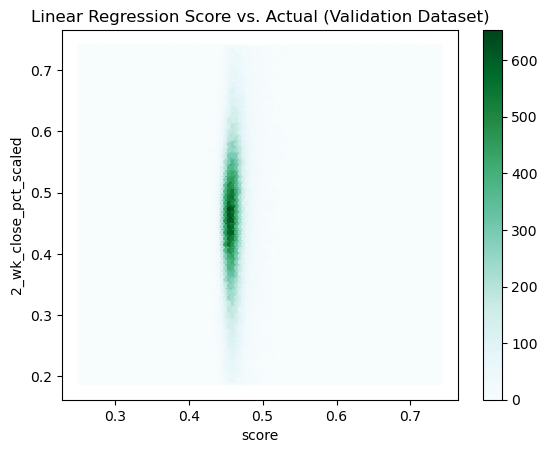

In [114]:
Y2.plot.hexbin(x='score', y='2_wk_close_pct_scaled', title = "Linear Regression Score vs. Actual (Validation Dataset)")

In [115]:
rmse = math.sqrt(mean_squared_error(Y2['2_wk_close_pct_scaled'], Y2['score']))
print("rmse: ", rmse)

rmse:  0.10778503667355584


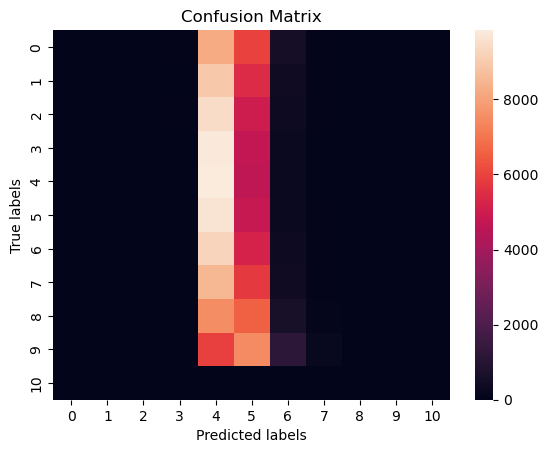

In [116]:
Y2['True_Decile'] = pd.qcut(Y2['2_wk_close_pct_scaled'], 10, labels=False)
deciles = pd.qcut(Y2['2_wk_close_pct_scaled'], 10, labels=False, duplicates = 'drop', retbins=True)
Y2.loc[:,'score_decile'] = np.digitize(Y2['score'],deciles[1])-1
plot_confusion_matrix(Y2['True_Decile'], Y2['score_decile'])

<Axes: >

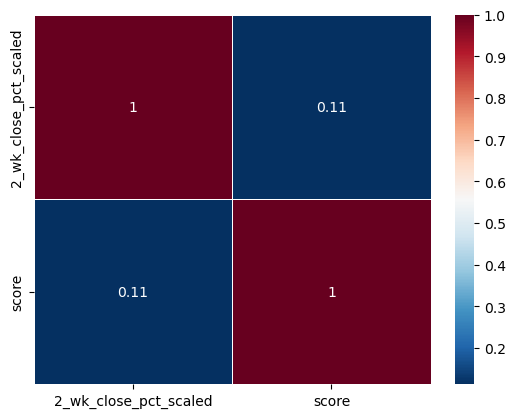

In [117]:
Y_Corr = Y2[['2_wk_close_pct_scaled', 'score']].copy()
Corr_Output = Y_Corr.corr(method='pearson')
sns.heatmap(Corr_Output, 
            xticklabels=Corr_Output.columns,
            yticklabels=Corr_Output.index,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### Test performance of top 2% of score

In [118]:
Y_Corr['2_wk_close_pct']  = Y_Corr['2_wk_close_pct_scaled'] * (hist_table3['2_wk_close_pct'].max() - hist_table3['2_wk_close_pct'].min()) +  hist_table3['2_wk_close_pct'].min()
score_threshold = 0.50058
print('Mean_Outcome: ',Y_Corr['2_wk_close_pct'].mean())
print('Higher Score Mean_Outcome: ', Y_Corr[Y_Corr['score'] > score_threshold]['2_wk_close_pct'].mean())
print('% of records with high score: ', len(Y_Corr[Y_Corr['score'] > score_threshold]) / len(Y_Corr))

Mean_Outcome:  0.9854642546246581
Higher Score Mean_Outcome:  1.0071280443043584
% of records with high score:  0.013559870332055074


#### Out of time validation

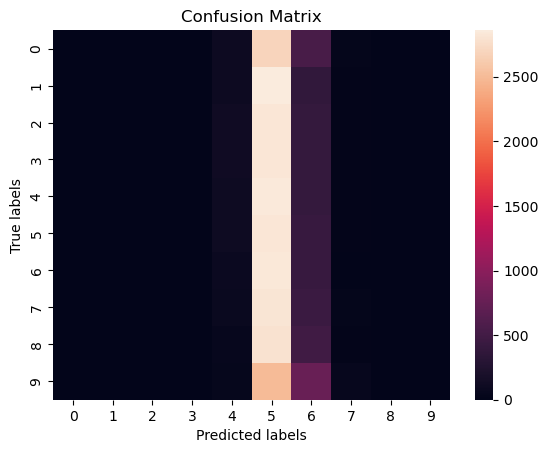

In [119]:
yhat_out=final_multi_model.predict(X_A_Out)
lin_Y_out = Y_Out.copy()
lin_Y_out['score'] = yhat_out

lin_Y_out['True_Decile'] = pd.qcut(lin_Y_out['2_wk_close_pct_scaled'], 10, labels=False)
deciles = pd.qcut(lin_Y_out['2_wk_close_pct_scaled'], 10, labels=False, duplicates = 'drop', retbins=True)
lin_Y_out.loc[:,'score_decile'] = np.digitize(lin_Y_out['score'],deciles[1])-1
plot_confusion_matrix(lin_Y_out['True_Decile'], lin_Y_out['score_decile'])

In [120]:
Y_Corr_out = lin_Y_out[['2_wk_close_pct_scaled', 'score']].copy()

In [121]:
Y_Corr_out['2_wk_close_pct']  = Y_Corr_out['2_wk_close_pct_scaled'] * (hist_table3['2_wk_close_pct'].max() - hist_table3['2_wk_close_pct'].min()) +  hist_table3['2_wk_close_pct'].min()
score_threshold = 0.486
print('Mean_Outcome: ',Y_Corr_out['2_wk_close_pct'].mean())
print('Higher Score Mean_Outcome: ', Y_Corr_out[Y_Corr_out['score'] > score_threshold]['2_wk_close_pct'].mean())
print('% of records with high score: ', len(Y_Corr_out[Y_Corr_out['score'] > score_threshold]) / len(Y_Corr_out))

Mean_Outcome:  0.9776488899215378
Higher Score Mean_Outcome:  0.9890999718062898
% of records with high score:  0.020582015309921663


#### Top 2% scored results yield 1% lift 

In [240]:
Y_Corr_out['2_wk_close_pct']  = Y_Corr_out['2_wk_close_pct_scaled'] * (hist_table3['2_wk_close_pct'].max() - hist_table3['2_wk_close_pct'].min()) +  hist_table3['2_wk_close_pct'].min()
score_threshold = 0.42
print('Mean_Outcome: ',Y_Corr_out['2_wk_close_pct'].mean())
print('Lower Score Mean_Outcome: ', Y_Corr_out[Y_Corr_out['score'] < score_threshold]['2_wk_close_pct'].mean())
print('% of records with high score: ', len(Y_Corr_out[Y_Corr_out['score'] < score_threshold]) / len(Y_Corr_out))

Mean_Outcome:  0.9776488899215378
Lower Score Mean_Outcome:  0.9696475694362077
% of records with high score:  0.0187650790814047


#### Lowest 2% scored are 1% worse

## Decision Tree

In [122]:
parameters = {'criterion': ['friedman_mse', 'squared_error', 'poisson'],
     'splitter': ['best', 'random'],
     'max_features': [1.0, 'sqrt'],
     'min_samples_leaf': [100, 200, 400],
     'min_samples_split': [200, 500, 1000]}

regtree = DecisionTreeRegressor()

In [123]:
regtree = DecisionTreeRegressor(criterion = 'friedman_mse', min_samples_split = 500, 
                                random_state = 99, min_samples_leaf = 200, min_impurity_decrease = 0.00005).fit(X_train,Y_train['2_wk_close_pct_scaled'])

#### Determine best parameters

In [124]:
regtree_cv = GridSearchCV(regtree, parameters, verbose=2).fit(X_train,Y_train['2_wk_close_pct_scaled'])

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=best; total time=  22.0s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=best; total time=  22.5s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=best; total time=  22.9s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=best; total time=  22.5s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=best; total time=  22.3s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=random; total time=   3.7s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=random; total time=   3.5s
[CV] END criterion=frie

[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=best; total time=  19.2s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=best; total time=  18.4s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=best; total time=  18.7s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=random; total time=   3.0s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=random; total time=   2.9s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=random; total time=   3.0s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=random; total time=   2.8s
[CV] END criterion=friedman_mse, max_features=1.0, min_samples_leaf=400, min_sampl

[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200, min_samples_split=200, splitter=random; total time=   0.6s
[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200, min_samples_split=200, splitter=random; total time=   0.6s
[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200, min_samples_split=200, splitter=random; total time=   0.6s
[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200, min_samples_split=200, splitter=random; total time=   0.6s
[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200, min_samples_split=200, splitter=random; total time=   0.7s
[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=best; total time=   2.9s
[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=best; total time=   3.2s
[CV] END criterion=friedman_mse, max_features=sqrt, min_samples_leaf=200,

[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=random; total time=   0.2s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=random; total time=   0.2s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min_samples_split=200, splitter=random; total time=   0.2s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=100, min

[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_samples_split=200, splitter=random; total time=   0.2s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_samples_split=500, splitter=best; total time=   1.8s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_samples_split=500, splitter=best; total time=   1.7s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_samples_split=500, splitter=random; total time=   0.2s
[CV] END criterion=squared_error, max_features=1.0, min_samples_leaf=400, min_s

[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=best; total time=   0.3s
[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=best; total time=   0.3s
[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=best; total time=   0.3s
[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=best; total time=   0.3s
[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=random; total time=   0.1s
[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=random; total time=   0.1s
[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=200, min_samples_split=500, splitter=random; total time=   0.1s
[CV] END criterion=squared_error, max_features=sqrt, min_samples_leaf=

[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=best; total time=   3.8s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=random; total time=   0.2s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=random; total time=   0.2s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=random; total time=   0.2s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=random; total time=   0.2s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=500, splitter=random; total time=   0.2s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=1000, splitter=best; total time=   3.9s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=100, min_samples_split=1000, splitter=best; total t

[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=500, splitter=random; total time=   0.2s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=1000, splitter=best; total time=   3.8s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=1000, splitter=best; total time=   3.9s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=1000, splitter=best; total time=   3.9s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=1000, splitter=best; total time=   4.0s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=1000, splitter=best; total time=   3.9s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=1000, splitter=random; total time=   0.2s
[CV] END criterion=poisson, max_features=1.0, min_samples_leaf=400, min_samples_split=1000, splitter=random; total 

[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=200, min_samples_split=1000, splitter=best; total time=   0.4s
[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=200, min_samples_split=1000, splitter=random; total time=   0.1s
[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=200, min_samples_split=1000, splitter=random; total time=   0.1s
[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=200, min_samples_split=1000, splitter=random; total time=   0.1s
[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=200, min_samples_split=1000, splitter=random; total time=   0.1s
[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=200, min_samples_split=1000, splitter=random; total time=   0.1s
[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=400, min_samples_split=200, splitter=best; total time=   0.3s
[CV] END criterion=poisson, max_features=sqrt, min_samples_leaf=400, min_samples_split=200, splitter=b

In [125]:
regtree_cv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_features=1.0,
                      min_impurity_decrease=5e-05, min_samples_leaf=200,
                      min_samples_split=500, random_state=99,
                      splitter='random')

In [126]:
yhat=regtree_cv.predict(X_test)
Y2_dt = Y_test.copy()
Y2_dt['score'] = yhat

<Axes: title={'center': 'Decision Tree Regression Score vs. Actual (Validation Dataset)'}, xlabel='score', ylabel='2_wk_close_pct_scaled'>

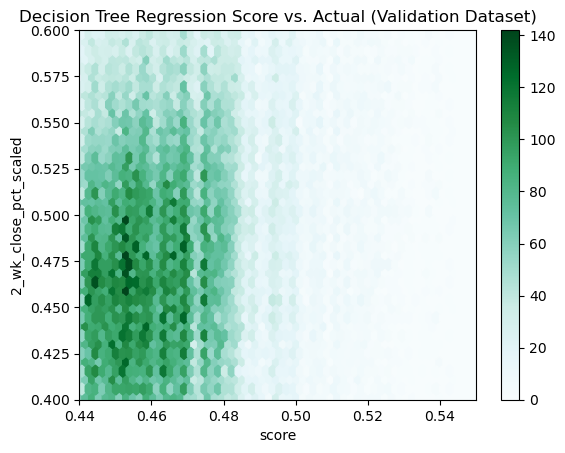

In [127]:
Y2_dt.plot.hexbin(x='score', y='2_wk_close_pct_scaled', title = 'Decision Tree Regression Score vs. Actual (Validation Dataset)' ,xlim = (0.44, 0.55), ylim = (0.4, 0.6))

<Axes: >

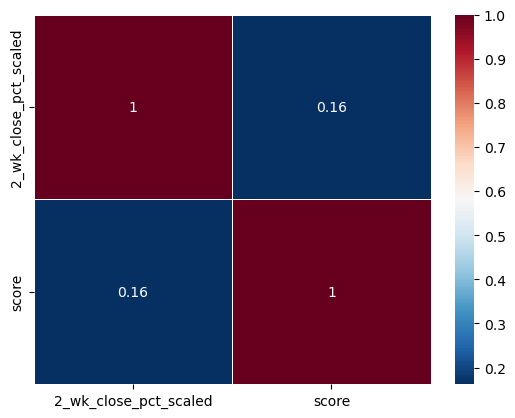

In [128]:
Y_Corr = Y2_dt[['2_wk_close_pct_scaled', 'score']].copy()
Corr_Output = Y_Corr.corr(method='pearson')
sns.heatmap(Corr_Output, 
            xticklabels=Corr_Output.columns,
            yticklabels=Corr_Output.index,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### Slightly better result for the decision tree

In [129]:
Y_Corr['2_wk_close_pct']  = Y_Corr['2_wk_close_pct_scaled'] * (hist_table3['2_wk_close_pct'].max() - hist_table3['2_wk_close_pct'].min()) +  hist_table3['2_wk_close_pct'].min()

#### Translation how this would perform in the real world

In [130]:
score_threshold = 0.52
print('Mean_Outcome: ',Y_Corr['2_wk_close_pct'].mean())
print('Higher Score Mean_Outcome: ', Y_Corr[Y_Corr['score'] > score_threshold]['2_wk_close_pct'].mean())
print('% of records with high score: ', len(Y_Corr[Y_Corr['score'] > score_threshold]) / len(Y_Corr))

Mean_Outcome:  0.9854642546246581
Higher Score Mean_Outcome:  1.0152601293912806
% of records with high score:  0.01388336624454943


#### How often do these high scores present themselves over time

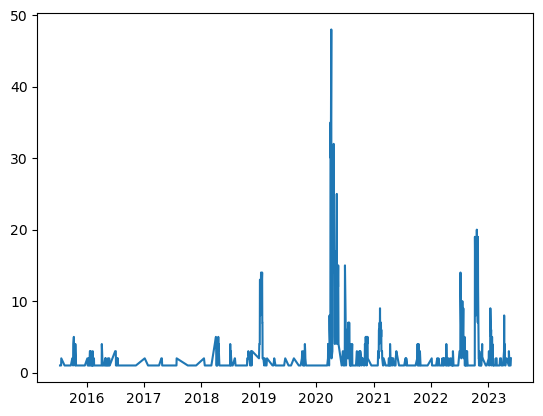

In [131]:
plt.plot(Y_Corr[Y_Corr['score'] > score_threshold].groupby('date2').count()['score']) 

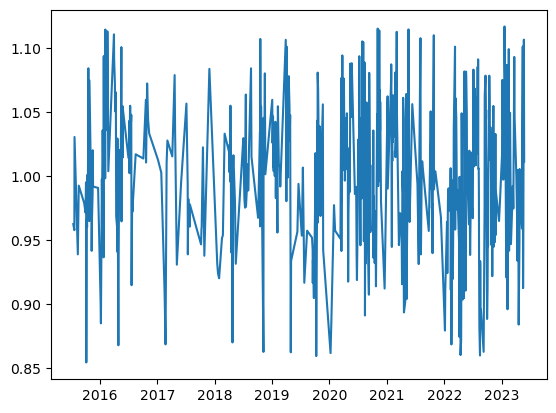

In [132]:
#Confirming results are consistent over time and not the result of certain events
plt.plot(Y_Corr[Y_Corr['score'] > score_threshold].groupby('date2').mean()['2_wk_close_pct']) 

#### Decision Tree outperforms standard linear regression, without an average return of 1% over a 2 week timeframe for the top 2% of scores

#### Out of time validation

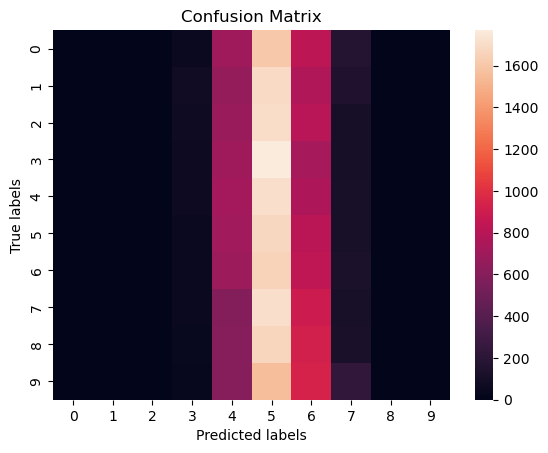

In [133]:
yhat_out=regtree_cv.predict(X_A_Out)
lin_dt_Y2_out = Y_Out.copy()
lin_dt_Y2_out['score'] = yhat_out

lin_dt_Y2_out['True_Decile'] = pd.qcut(lin_dt_Y2_out['2_wk_close_pct_scaled'], 10, labels=False)
deciles = pd.qcut(lin_dt_Y2_out['2_wk_close_pct_scaled'], 10, labels=False, duplicates = 'drop', retbins=True)
lin_dt_Y2_out.loc[:,'score_decile'] = np.digitize(lin_dt_Y2_out['score'],deciles[1])-1
plot_confusion_matrix(lin_dt_Y2_out['True_Decile'], lin_dt_Y2_out['score_decile'])

In [134]:
Y_Corr_out = lin_dt_Y2_out[['2_wk_close_pct_scaled', 'score']].copy()

In [233]:
Y_Corr_out['2_wk_close_pct']  = Y_Corr_out['2_wk_close_pct_scaled'] * (hist_table3['2_wk_close_pct'].max() - hist_table3['2_wk_close_pct'].min()) +  hist_table3['2_wk_close_pct'].min()
score_threshold = 0.505
print('Mean_Outcome: ',Y_Corr_out['2_wk_close_pct'].mean())
print('Higher Score Mean_Outcome: ', Y_Corr_out[Y_Corr_out['score'] > score_threshold]['2_wk_close_pct'].mean())
print('% of records with high score: ', len(Y_Corr_out[Y_Corr_out['score'] > score_threshold]) / len(Y_Corr_out))

Mean_Outcome:  0.9776488899215378
Higher Score Mean_Outcome:  0.981981317393292
% of records with high score:  0.021892592261638817


#### Top 2% yields .4% higher return

## Logistic Model Build

### Prepare Data for Logistic Regression

In [139]:
log_final_data = final_data_precursor.copy()

In [140]:
log_final_data['bin_outcome'] = pd.qcut(log_final_data['2_wk_close_pct'], 10, labels=False).apply(str)

### Transform linear variables to categorical

#### Money Flow Index Ranking

In [141]:
log_final_data['MFI_Rnk'] = pd.qcut(log_final_data['money_flow_index'], 5, 
                               labels = False) 


#### KST Flag

In [142]:
log_final_data['KST_S2_A'] = np.where((log_final_data['KST'] < 0) & (log_final_data['KST'] < log_final_data['KST_Signal']), 1, 0)
log_final_data['KST_S2_B'] = np.where((log_final_data['KST'] < 0) & (log_final_data['KST'] > log_final_data['KST_Signal']), 1, 0)
log_final_data['KST_S2_C'] = np.where((log_final_data['KST'] > 0) & (log_final_data['KST'] < log_final_data['KST_Signal']), 1, 0)
log_final_data['KST_S2_D'] = np.where((log_final_data['KST'] > 0) & (log_final_data['KST'] > log_final_data['KST_Signal']), 1, 0)

#### Bollinger Band Proximity

In [143]:
log_final_data['Boll_Upper_Rnk'] = pd.qcut(log_final_data['Boll_Upper_Dist'], 5, 
                               labels = False) 
log_final_data['Boll_Mid_Rnk'] = pd.qcut(log_final_data['Boll_Mid_Dist'], 5, 
                               labels = False)
log_final_data['Boll_Lower_Rnk'] = pd.qcut(log_final_data['Boll_Lower_Dist'], 5, 
                               labels = False)

#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['Boll_Upper_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['Boll_Mid_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['Boll_Lower_Rnk', ])

#### RSI Location

In [144]:
log_final_data['RSI_Rnk'] = pd.qcut(log_final_data['RSI'], 5, 
                               labels = False)
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['RSI_Rnk', ])

#### MACD Rankings

In [145]:
log_final_data['MACD_Line_Rnk'] = pd.qcut(log_final_data['MACD_Line2'], 5, 
                               labels = False)

log_final_data['MACD_Signal_Rnk'] = pd.qcut(log_final_data['MACD_Signal2'], 5, 
                               labels = False)

log_final_data['MACD_Histogram_Rnk'] = pd.qcut(log_final_data['MACD_Histogram2'], 5, 
                               labels = False)

#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['MACD_Line_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['MACD_Signal_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['MACD_Histogram_Rnk', ])

#### Stochastic Ranking

In [146]:
log_final_data['SO_K_Rnk'] = pd.qcut(log_final_data['SO_K'], 5, 
                               labels = False)

#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['SO_K_Rnk', ])

#### ATR Ranking

In [147]:
log_final_data['ATR2'] = log_final_data['ATR'] / log_final_data['close']
log_final_data['ATR_Rnk'] = pd.qcut(log_final_data['ATR2'], 5, 
                               labels = False)
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['ATR_Rnk', ])

#### FIBO Ranking

In [148]:
log_final_data['min_fibo'] = log_final_data[['fibo0_Dist','fibo100_Dist','fibo25_Dist','fibo50_Dist','fibo618_Dist','fibo786_Dist','fibo886_Dist']].min(axis=1)

log_final_data['min_fibo_dist2'] = (log_final_data['min_fibo'] / log_final_data['close']) / log_final_data['volatility']

log_final_data['Fibo_Rnk'] = pd.qcut(log_final_data['min_fibo_dist2'], 5, 
                               labels = False)
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['Fibo_Rnk', ])

log_final_data = log_final_data.drop(columns = ['fibo0_Dist','fibo25_Dist', 'fibo50_Dist','fibo618_Dist', \
                                                            'fibo786_Dist','fibo886_Dist','fibo100_Dist','min_fibo','min_fibo_dist2'])

#### Ichimoku Cloud Rankings

In [149]:

log_final_data['IC_CL_Rnk'] = pd.qcut(log_final_data['IC_CL2'], 5, 
                               labels = False)
log_final_data['IC_BL_Rnk'] = pd.qcut(log_final_data['IC_BL2'], 5, 
                               labels = False)
log_final_data['LS_A_Rnk'] = pd.qcut(log_final_data['LS_A2'], 5, 
                               labels = False)
log_final_data['LS_B_Rnk'] = pd.qcut(log_final_data['LS_B2'], 5, 
                               labels = False)
log_final_data['C26_Rnk'] = pd.qcut(log_final_data['Close_26_2'], 5, 
                               labels = False)

#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['IC_CL_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['IC_BL_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['LS_A_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['LS_B_Rnk', ])
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['C26_Rnk', ])

log_final_data = log_final_data.drop(columns = ['IC_CL2','IC_BL2', 'LS_A2', \
                                                            'LS_B2','Close_26_2'])


#### On-Balance Volume (OBV) Ranking

In [150]:
log_final_data['OBV_Rnk'] = pd.qcut(log_final_data['OBV2'], 5, 
                               labels = False)
#final_data_precursor = pd.get_dummies(final_data_precursor, columns=['OBV_Rnk', ])
log_final_data = log_final_data.drop(columns = ['OBV2','vol26_avg'])

#### Volatility Ranking

In [151]:
log_final_data['volatility_Rnk'] = pd.qcut(log_final_data['volatility'], 5, 
                               labels = False)

In [152]:
log_final_data2 = log_final_data[['2_wk_close_pct','bin_outcome','MFI_Rnk', 'KST_S2_A', 'KST_S2_B', 'KST_S2_C', 'KST_S2_D','Boll_Upper_Rnk',
                'Boll_Mid_Rnk','Boll_Lower_Rnk','RSI_Rnk','MACD_Line_Rnk','MACD_Signal_Rnk','MACD_Histogram_Rnk',
               'SO_K_Rnk','ATR_Rnk','Fibo_Rnk','IC_CL_Rnk','IC_BL_Rnk','LS_A_Rnk','LS_B_Rnk','C26_Rnk',
               'OBV_Rnk','volatility_Rnk','revenue_decile','earnings_decile','pe_vs_ind_decile',
                'earnings_1wk', 'earnings_2wk', 'earnings_4wk','earnings_8wk']]

## One Hot encoding

In [153]:
log_final_data3 = pd.get_dummies(log_final_data2, columns = ['MFI_Rnk', 'KST_S2_A', 'KST_S2_B', 'KST_S2_C', 'KST_S2_D','Boll_Upper_Rnk',
                'Boll_Mid_Rnk','Boll_Lower_Rnk','RSI_Rnk','MACD_Line_Rnk','MACD_Signal_Rnk','MACD_Histogram_Rnk',
               'SO_K_Rnk','ATR_Rnk','Fibo_Rnk','IC_CL_Rnk','IC_BL_Rnk','LS_A_Rnk','LS_B_Rnk','C26_Rnk',
               'OBV_Rnk','volatility_Rnk','revenue_decile','earnings_decile','pe_vs_ind_decile'])

In [154]:
summary = pd.DataFrame()
summary['counts'] = log_final_data[['2_wk_close_pct_scaled','bin_outcome']].groupby('bin_outcome').count()
summary['min'] = log_final_data[['2_wk_close_pct_scaled','bin_outcome']].groupby('bin_outcome').min()
summary['max'] = log_final_data[['2_wk_close_pct_scaled','bin_outcome']].groupby('bin_outcome').max()
summary

,counts,min,max
bin_outcome,,,
0,136585,0.000000,0.299152
1,136586,0.299152,0.362372
2,136584,0.362373,0.401715
3,136585,0.401715,0.432273
4,136585,0.432273,0.458995
5,136586,0.458996,0.485546
6,136586,0.485546,0.515122
7,136583,0.515123,0.552962
8,136585,0.552962,0.616049


In [155]:
log_final_data_in = log_final_data3[log_final_data3.index.get_level_values(1) < '2023-06-01']
log_final_data_out = log_final_data3[log_final_data3.index.get_level_values(1) >= '2023-06-01']

In [157]:
x = log_final_data_in.drop(columns = ['bin_outcome','2_wk_close_pct'])
x_out = log_final_data_out.drop(columns = ['bin_outcome','2_wk_close_pct'])
y = log_final_data_in[['bin_outcome','2_wk_close_pct']]
y_out = log_final_data_out[['bin_outcome','2_wk_close_pct']]
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, random_state=2)
#Y_train2 = Y_train['bin_outcome','2_wk_close_pct']
#Y_test2 = Y_test['bin_outcome','2_wk_close_pct']

### Build Logistic Model

In [158]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [159]:
parameters = {'C': [0.1, 1, 10,100]}
#Removed additional solvers as they did not converge and were slowing it down

In [160]:
log_cv = GridSearchCV(logreg, parameters, verbose=2).fit(X_train,Y_train['bin_outcome'].values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=  40.2s
[CV] END ..............................................C=0.1; total time=  36.6s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=0.1; total time=  38.0s
[CV] END ..............................................C=0.1; total time=  35.8s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=0.1; total time=  37.1s
[CV] END ................................................C=1; total time=  37.1s
[CV] END ................................................C=1; total time=  38.2s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................................C=1; total time=  38.1s
[CV] END ................................................C=1; total time=  36.1s
[CV] END ................................................C=1; total time=  36.1s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................................C=10; total time=  38.3s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................................C=10; total time=  37.8s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................................C=10; total time=  37.8s
[CV] END ...............................................C=10; total time=  35.9s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................................C=10; total time=  37.1s
[CV] END ..............................................C=100; total time=  35.4s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=100; total time=  38.5s
[CV] END ..............................................C=100; total time=  37.3s
[CV] END ..............................................C=100; total time=  37.0s


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=100; total time=  36.4s


In [161]:
log_cv.best_estimator_

LogisticRegression(C=100)

In [162]:
log_pred = log_cv.predict(X_train)

#### The model seems to have trouble identifying categories

accuracy score - train:  0.15440268202487473


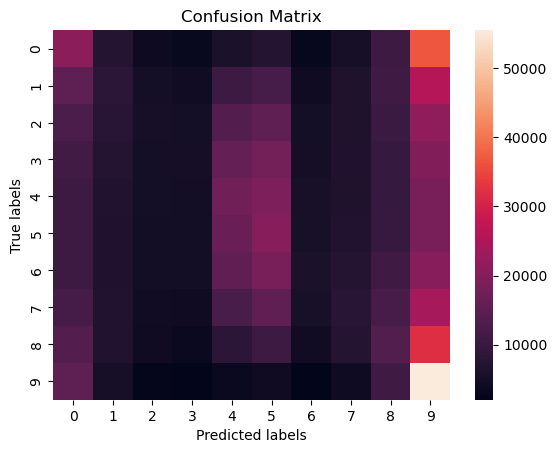

In [163]:
plot_confusion_matrix(Y_train['bin_outcome'],log_pred)
print("accuracy score - train: ",accuracy_score(log_pred, Y_train['bin_outcome']))

#### So far it looks like it works fairly well with the test dataset as well

accuracy score - test:  0.15164499206744408


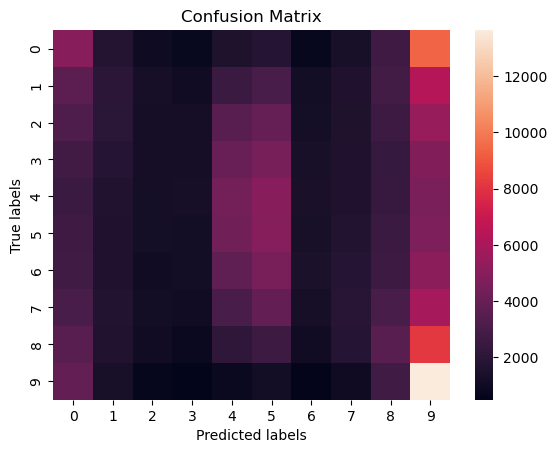

In [164]:
log_pred_test = log_cv.predict(X_test)
plot_confusion_matrix(Y_test['bin_outcome'], log_pred_test)
print("accuracy score - test: ",accuracy_score(Y_test['bin_outcome'], log_pred_test))

(array([32914., 27329., 35230., 10351., 68051., 29940., 15824., 11451.,
        27969.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

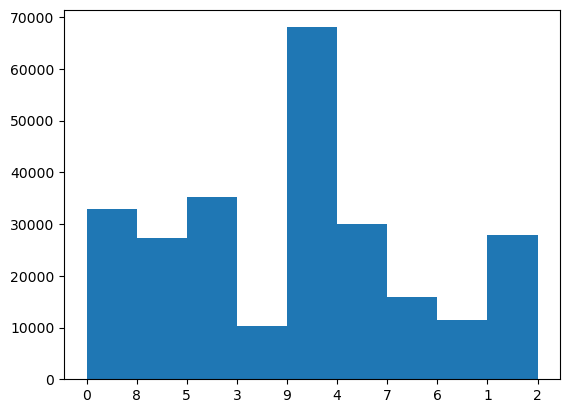

In [165]:
plt.hist(log_pred_test, bins=9)

In [166]:
log_Y_test = Y_test.copy()

In [167]:
#log_Y_test['2_wk_close_pct']  = log_Y_test['2_wk_close_pct_scaled'] * (hist_table3['2_wk_close_pct'].max() - hist_table3['2_wk_close_pct'].min()) +  hist_table3['2_wk_close_pct'].min()

In [168]:
pred_proba = log_cv.predict_proba(X_test)

In [169]:
log_Y_test['pred_bin'] = log_pred_test
log_Y_test['pred_bin9_proba'] = pred_proba[:, 9]

In [170]:
log_Y_test.groupby('pred_bin').mean()

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\2775107277.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_Y_test.groupby('pred_bin').mean()


,2_wk_close_pct,pred_bin9_proba
pred_bin,,
0,1.000068,0.115610
1,0.999970,0.075986
2,0.999904,0.061316
3,1.000045,0.047896
4,1.000857,0.030018
5,1.001958,0.030819
6,1.002877,0.045818
7,1.004254,0.065096
8,1.007181,0.099401


#### Out of time validation

In [171]:
pred_out = log_cv.predict(x_out)

In [172]:
log_Y_out = y_out.copy()

In [173]:
log_Y_out['pred_bin'] = pred_out
log_Y_out.groupby('pred_bin').mean()

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\2253805907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_Y_out.groupby('pred_bin').mean()


,2_wk_close_pct
pred_bin,
0,1.001388
1,0.998305
2,0.995694
3,0.993484
4,0.992378
5,0.995002
6,1.002245
7,1.000237
8,1.000840


#### Logistic Model did not converge, and yields poor results

### SVC Model Build

In [174]:
svc_model = svm.SVC(max_iter = 100)

In [175]:
parameters = {'C': [.01, .1, 1, 10,100],
     'gamma' : ['scale', 'auto'],
     'max_iter' : [100]}


In [176]:
SVC_cv = GridSearchCV(svc_model, parameters, verbose=2, error_score="raise").fit(X_train,Y_train['bin_outcome'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.01, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.01, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.01, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.01, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..................C=0.01, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.01, gamma=auto, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.01, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.01, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.01, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.01, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=scale, max_iter=100; total time= 8.6min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=scale, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=scale, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=scale, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, gamma=scale, max_iter=100; total time= 8.6min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=auto, max_iter=100; total time= 8.8min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=auto, max_iter=100; total time= 8.8min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=auto, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=auto, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, gamma=auto, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=scale, max_iter=100; total time= 8.6min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=scale, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=scale, max_iter=100; total time= 8.9min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=scale, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, gamma=scale, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, gamma=auto, max_iter=100; total time= 8.6min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=scale, max_iter=100; total time= 8.6min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=scale, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=scale, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=scale, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, gamma=scale, max_iter=100; total time= 8.5min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=auto, max_iter=100; total time= 8.6min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=auto, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=auto, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=auto, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, gamma=auto, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=100, gamma=scale, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=100, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=100, gamma=scale, max_iter=100; total time= 8.4min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=100, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=100, gamma=scale, max_iter=100; total time= 8.3min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=100, gamma=auto, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=100, gamma=auto, max_iter=100; total time= 8.8min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=100, gamma=auto, max_iter=100; total time= 8.6min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=100, gamma=auto, max_iter=100; total time= 8.7min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=100, gamma=auto, max_iter=100; total time= 8.8min


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy score - train:  0.10320661782303577


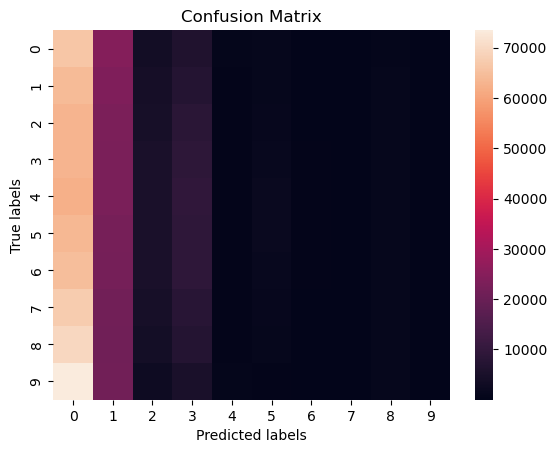

In [177]:
svc_pred = SVC_cv.predict(X_train)
plot_confusion_matrix(Y_train['bin_outcome'], svc_pred)
print("accuracy score - train: ",accuracy_score(Y_train['bin_outcome'], svc_pred))

accuracy score - test:  0.10399947502306424


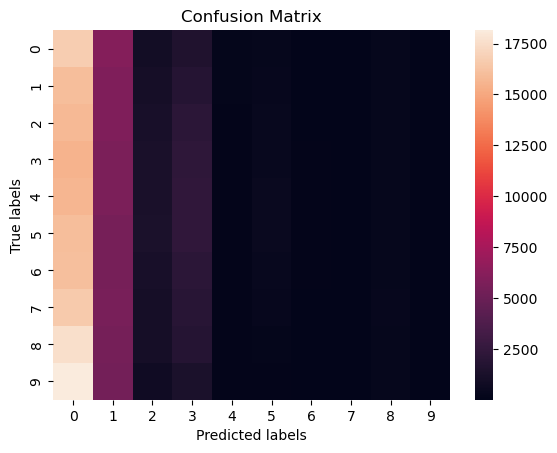

In [178]:
svc_test_pred = SVC_cv.predict(X_test)
plot_confusion_matrix(Y_test['bin_outcome'], svc_test_pred)
print("accuracy score - test: ",accuracy_score(Y_test['bin_outcome'], svc_test_pred))

accuracy score - test:  0.11068750974361881


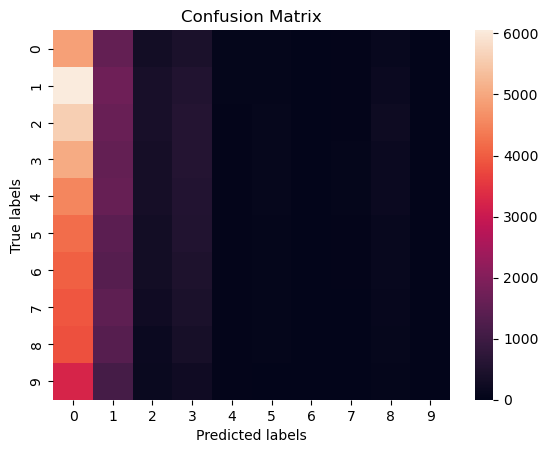

In [180]:
svc_out_pred = SVC_cv.predict(x_out)
plot_confusion_matrix(log_Y_out['bin_outcome'], svc_out_pred)
print("accuracy score - test: ",accuracy_score(log_Y_out['bin_outcome'], svc_out_pred))

In [181]:
svc_y = log_Y_out.copy()

In [182]:
svc_y['pred_bin'] = svc_out_pred

In [183]:
svc_y.groupby('pred_bin').mean()['2_wk_close_pct'].to_frame()

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\483411573.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  svc_y.groupby('pred_bin').mean()['2_wk_close_pct'].to_frame()


,2_wk_close_pct
pred_bin,
0,0.996224
1,0.999011
2,0.992919
3,0.997501
4,0.990321
5,0.995667
6,0.996537
7,0.989422
8,0.990798


#### Surprising good result, let's dig deeper

In [219]:
svc_y.groupby('pred_bin').count()['2_wk_close_pct'].to_frame()

,2_wk_close_pct
pred_bin,
0,45336
1,14745
2,2930
3,4751
4,380
5,627
6,110
7,304
8,1362


#### Unfortunately, there are very few records forecasted to be in bin 9, so it cannot be considered reliable

### Logistic Decision Tree

In [184]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
     'splitter': ['best', 'random'],
     'max_features': [1.0, 'sqrt'],
     'min_samples_leaf': [100, 200, 400],
     'min_samples_split': [200, 500, 1000]}


In [185]:
regtree = DecisionTreeClassifier(criterion = 'entropy', 
                                 min_samples_split = 1000, random_state = 99, min_samples_leaf = 400, 
                                 min_impurity_decrease = 0.00005)
#model = regtree.fit(X_train,Y_train2)

In [186]:
regtree_cv = GridSearchCV(regtree, parameters).fit(X_train,Y_train['bin_outcome'])

In [187]:
pred = regtree_cv.predict(X_train)

accuracy score - train:  0.1532253394992627


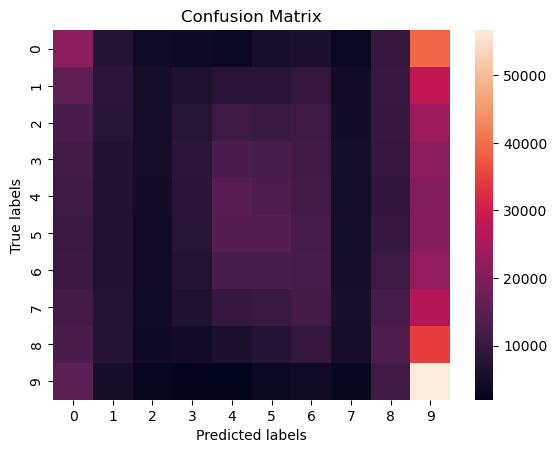

In [188]:
plot_confusion_matrix(Y_train['bin_outcome'],pred)
print("accuracy score - train: ",accuracy_score(pred, Y_train['bin_outcome']))

In [189]:
log_dt_y = Y_test.copy()

accuracy score - train:  0.15100421139585962


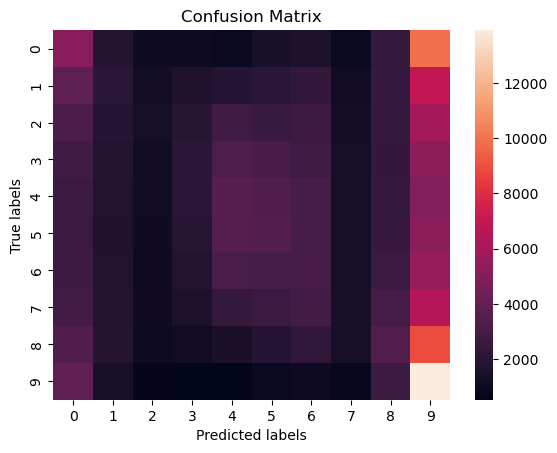

In [190]:
log_pred_test = regtree_cv.predict(X_test)
plot_confusion_matrix(log_dt_y['bin_outcome'], log_pred_test)
print("accuracy score - train: ",accuracy_score(log_dt_y['bin_outcome'] , log_pred_test))

In [196]:
log_dt_y_out = y_out.copy()

accuracy score - train:  0.11958786263977664


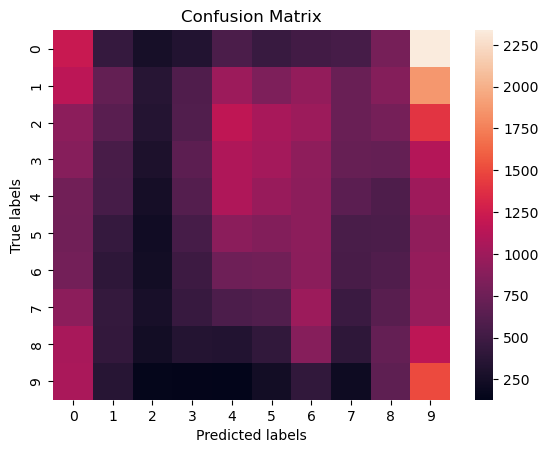

In [197]:
log_dt_out = regtree_cv.predict(x_out)
plot_confusion_matrix(log_dt_y_out['bin_outcome'], log_dt_out)
print("accuracy score - train: ",accuracy_score(log_dt_y_out['bin_outcome'] , log_dt_out))

In [199]:
log_dt_y_out['pred_bin'] = log_dt_out

In [200]:
#### Test Outcome
log_dt_y_out.groupby('pred_bin').mean()['2_wk_close_pct'].to_frame()

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\3435758043.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_dt_y_out.groupby('pred_bin').mean()['2_wk_close_pct'].to_frame()


,2_wk_close_pct
pred_bin,
0,1.001894
1,0.997678
2,0.995960
3,0.995615
4,0.989969
5,0.995222
6,1.003104
7,0.992716
8,1.000245


## Random Forest Model

In [202]:
rf_tree = RandomForestClassifier(min_samples_split = 1000, random_state = 99, min_samples_leaf = 400)
rf_model = rf_tree.fit(X_train,Y_train['bin_outcome'])

In [203]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
     'max_features': [1.0, 'sqrt'],
     'min_samples_leaf': [100, 200, 400],
     'min_samples_split': [200, 500, 1000]}


In [204]:
rf_pred = rf_model.predict(X_train)

In [205]:
# Grid search took over 3 days before the power went out and killed it, leaving this one as is for now
#rf_tree_cv = GridSearchCV(rf_model, parameters).fit(X_train,Y_train2['bin2'])

In [206]:
rf_pred = rf_tree.predict(X_train)

accuracy score - train:  0.18073944830887292


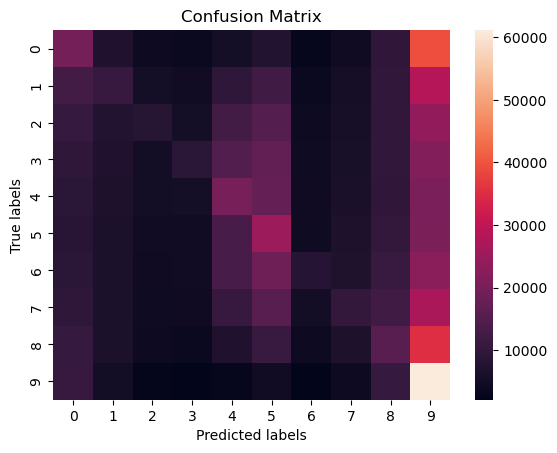

In [208]:
plot_confusion_matrix(Y_train['bin_outcome'],rf_pred)
print("accuracy score - train: ",accuracy_score(rf_pred, Y_train['bin_outcome']))

accuracy score - test:  0.157798030564466


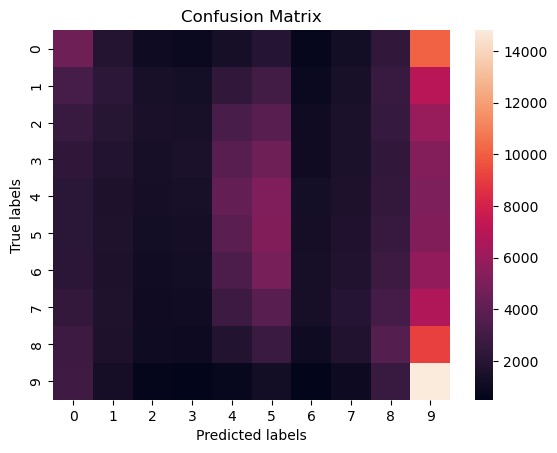

In [210]:
rf_pred_test = rf_model.predict(X_test)
plot_confusion_matrix(Y_test['bin_outcome'], rf_pred_test)
print("accuracy score - test: ",accuracy_score(Y_test['bin_outcome'], rf_pred_test))

(array([74916., 27524., 11595., 26978., 11630., 15391., 36100., 10548.,
        44377.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

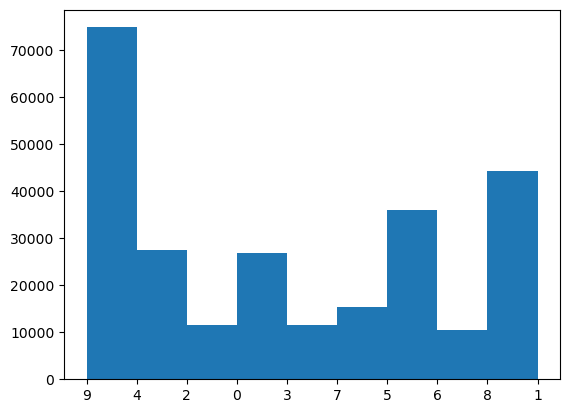

In [211]:
plt.hist(rf_pred_test, bins=9)

In [212]:
rf_Y_test = Y_test.copy()
rf_Y_test['rf_pred_bin'] = rf_pred_test

In [213]:
rf_Y_test.groupby('rf_pred_bin').mean()['2_wk_close_pct'].to_frame()

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\861880068.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rf_Y_test.groupby('rf_pred_bin').mean()['2_wk_close_pct'].to_frame()


,2_wk_close_pct
rf_pred_bin,
0,0.995927
1,0.998358
2,0.997700
3,0.998390
4,1.000111
5,1.002155
6,1.004372
7,1.005946
8,1.008992


In [216]:
rf_pred_out = rf_model.predict(x_out)
rf_y_out = y_out.copy()
rf_y_out['rf_pred_bin'] = rf_pred_out

In [217]:
rf_y_out.groupby('rf_pred_bin').mean()['2_wk_close_pct'].to_frame()

C:\Users\Eric\AppData\Local\Temp\ipykernel_23572\679283363.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rf_y_out.groupby('rf_pred_bin').mean()['2_wk_close_pct'].to_frame()


,2_wk_close_pct
rf_pred_bin,
0,0.999312
1,0.999496
2,0.997039
3,0.996593
4,0.992940
5,0.994210
6,0.996940
7,1.001787
8,0.997792


#### In conclusion, and this does not come as a particular surprise, but it is extremely difficult to forcast with a level of accuracy how stocks will perform over time.  Variables were initially chosen based on research of popular technical and fundamental indicators.  A test/train split was created, along with a separate out of time validation set which is generally appropriate for most time-series type models as they can be events which create bias which will not show in an in-time validation.  From there, after review of the histograms and coolinearity, outliers were removed and the variables rescaled.  A polynomial model was attempted but there was no lift in adding power to the different variables.  A multivar model actually proved to be the most effective, yielding a 1% lift relative to the general population.  A number of Logistic models were also attempted, including standard logistic regression, SVC, a decision tree and a random forest.    SVC appeared to yield excellent results, but on further review the volume of high value predictions was extremely small, therefore untrustworthy.  Overall the 1% lift from the multivar linear modle outperformed all others and will be investigated further.